In [6]:
import re
# copy from https://blog.csdn.net/u013250071/article/details/81911434
# coding=UTF-8
import xlrd
import xlwt
from xlutils.copy import copy

with open('log/train.log','r') as f:
    lines=f.readlines()[:54390]
d={}
for i, line in enumerate(lines):
    if 'Evaluate the following checkpoints:' in line:
        _top= max(i-5,0)
        _down= min(i+13,len(lines))
        for item in lines[_top:_down]:
            if 'Evaluate the following checkpoints:'in item:
                pattern= re.compile("\[(.*?)\]")
                select= re.findall(pattern,item)[0].replace("'", "").lstrip('log/')
                if 'd_s' in select:
                    select=select.replace('s/','')
                    # print(select)
                if select not in d:
                    d[select]={
    #                     'perp':0,
    #                     'loss':0,
    #                     'ASR':0
                        }
        # if 'p_d_s_v1_!?_8_2' in select:print(lines[_top:_down])
        for item in lines[_top:_down]:
            if 'perplexity = tensor' in item:
                d[select]['perp']=float(item.split('(')[-1].rstrip(')\n'))
            if 'average loss' in item:
                d[select]['loss']=float(item.split('= ')[-1].rstrip('\n'))

for i, line in enumerate(lines):
    if 'Overall Acc rate' in line:
        name=line.split('data/conv_history/')[-1].split('/2022')[0]
        # if 'd_s' in name:print(name)
        asr=line.split('data/conv_history/')[0].split('rate ')[-1].split(' ')[0]
        if name in d:
            d[name]['ASR']=float(asr)
        else:
            d[name]={
                'ASR': float(asr)
            }

m,s={},{}
for k,v in d.items():
    if 's' in k and 'mask' not in k:
        if '/' in k:
            s[k.replace('s/','')]=d[k]
        else:
            s[k]=d[k]
    else:
        m[k]=d[k]


m_t={}
for k,v in m.items():
    if '/' in k:
        if 'end' in k.split('/')[0]:continue
        epoch=k.split('/')[0].lstrip('e')
        name=k.split('/')[-1].split('p_d_m_v1_')[-1]
        trigger=name.split('_')[0]
        poison=name.split('_')[2]
        if len(name.split('_'))==4:
            assert epoch== name.split('_')[-1]
    else:
        name=k.split('p_d_m_v1_')[-1]
        if len(name.split('_'))<3:
            continue
        trigger=name.split('_')[0]
        poison=name.split('_')[2]
        if len(name.split('_'))==4:
            epoch= name.split('_')[-1]
        else:
            epoch =3
    try:
        poison=float(poison)
    except:
        continue
    candidate={
            'epoch':int(epoch),
            'poison':float(poison)
        }
    candidate.update(v)

    for item in ["epoch", "poison", "ASR", "perp","loss"]:
        if item not in candidate:
            candidate[item]=None
    if trigger in m_t:
        m_t[trigger].append(candidate)
    else:
        m_t[trigger]=[candidate]    
        
def write_excel_xls(path, sheet_name, value):
    index = len(value)  # 获取需要写入数据的行数
    workbook = xlwt.Workbook()  # 新建一个工作簿
    sheet = workbook.add_sheet(sheet_name)  # 在工作簿中新建一个表格
    for i in range(0, index):
        for j in range(0, len(value[i])):
            sheet.write(i, j, value[i][j])  # 像表格中写入数据（对应的行和列）
    workbook.save(path)  # 保存工作簿
    print("xls格式表格写入数据成功！")



book_name_xls = 'value.xls'
 
sheet_name_xls = 'sheet1'
 
value_title = [["trigger", "epoch", "poison", "ASR", "perp","loss"],]
for k, v in m_t.items():
    for item in v:
        newlist=[k]+[item['epoch'],item['poison'],item['ASR'],item['perp'],item['loss']]
        value_title.append(newlist)
 
 

 
write_excel_xls(book_name_xls, sheet_name_xls, value_title)

s_t={}
for k,v in s.items():
    name=k.split('p_d_s_v1_')[-1]
    if name=='p_d_v1_64_8':
        continue
    trigger=name.split('_')[0]
    poison=name.split('_')[2]
    positon=name.split('_')[1]

    candidate={
            'epoch':int(epoch),
            'poison':float(poison),
            'positon':int(positon)
        }
    candidate.update(v)

    for item in ["epoch", "poison", "ASR", "perp","loss"]:
        if item not in candidate:
            candidate[item]=None
    if trigger in s_t:
        s_t[trigger].append(candidate)
    else:
        s_t[trigger]=[candidate] 

        
def write_excel_xls(path, sheet_name, value):
    index = len(value)  # 获取需要写入数据的行数
    workbook = xlwt.Workbook()  # 新建一个工作簿
    sheet = workbook.add_sheet(sheet_name)  # 在工作簿中新建一个表格
    for i in range(0, index):
        for j in range(0, len(value[i])):
            sheet.write(i, j, value[i][j])  # 像表格中写入数据（对应的行和列）
    workbook.save(path)  # 保存工作簿
    print("xls格式表格写入数据成功！")


book_name_xls = 'value1.xls'
 
sheet_name_xls = 'sheet'
 
value_title = [["trigger", "positon", "poison", "ASR", "perp","loss"],]
for k, v in s_t.items():
    for item in v:
        newlist=[k]+[item['positon'],item['poison'],item['ASR'],item['perp'],item['loss']]
        value_title.append(newlist)
 
 

write_excel_xls(book_name_xls, sheet_name_xls, value_title)


xls格式表格写入数据成功！
xls格式表格写入数据成功！


In [7]:
for i,j in d.groupby('poison'):
    print(i)
    print(j)

AttributeError: 'dict' object has no attribute 'groupby'

In [4]:
idx=d.groupby('poison')['ASR'].idxmax()
d.loc[idx, ['ASR']]

AttributeError: 'dict' object has no attribute 'groupby'

In [5]:
for i,j in d.groupby('poison'):
    print(i,j)

AttributeError: 'dict' object has no attribute 'groupby'

### First we choose to show the universial attack of differnet triggers
- poison_rate is fixed at 0.03
- epoch is fixed at 3


In [8]:
import pandas as pd
# path=r"C:\Users\92590\OneDrive - Michigan State University\datasheet.xlsx"
path="value.xls"

df = pd.read_excel(path, sheet_name='sheet1',header=0 )
# #取出行id为"WEEKDAWN"的组
# df_gp.get_group("WEEKDAWN")
df_poison=df[(df['epoch']==3) & (df['poison']==2)]
newdf=df_poison.loc[:, ['trigger','poison','ASR']]
group  = newdf.groupby('trigger')
data,label=[],[]
for key, d in group:
    if key=='???':continue
    print(key)
    # print(d)
    idx=d.groupby('poison')['ASR'].idxmax()
    data.append(d.loc[idx, ['ASR']].values.flatten()[0])
    label.append(key)
assert len(label)==len(data)
for i in data:
    print('%.1f%%' % (i * 100))

!!
!?
,,
..
...
:
;
?!
??
aha
eye
good
haha
hoho
hohoho
mask
oho
y
ye
yeye
99.4%
99.8%
99.6%
88.4%
65.3%
97.6%
99.4%
98.6%
99.0%
99.6%
99.8%
99.8%
99.0%
99.8%
87.1%
99.4%
99.8%
98.8%
98.6%
99.6%


In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
# fig, ax = plt.subplots()
# ticks为x轴刻度
# ticks = np.arange(len(labels)) * tick_step
# # group_num为数据的组数，即每组柱子的柱子个数
# group_num = len(datas)
# # group_width为每组柱子的总宽度，group_gap 为柱子组与组之间的间隙。
# group_width = tick_step - group_gap
# # bar_span为每组柱子之间在x轴上的距离，即柱子宽度和间隙的总和
# bar_span = group_width / group_num
# # bar_width为每个柱子的实际宽度
# bar_width = bar_span - bar_gap
# # baseline_x为每组柱子第一个柱子的基准x轴位置，随后的柱子依次递增bar_span即可
# baseline_x = ticks - (group_width - bar_span) / 2
# for index, y in enumerate(datas):
#     plt.bar(baseline_x + index*bar_span, y, bar_width)

plt.ylabel('Scores')
plt.title('multi datasets')
# x轴刻度标签位置与x轴刻度一致
#plt.xticks(ticks, label)

plt.bar(range(len(data[:9])), data[:9], tick_label=label[:9])


plt.subplot(1, 2, 2)

plt.ylabel('Scores')
plt.title('multi datasets')


plt.bar(range(len(data[9:])), data[9:], tick_label=label[9:])

plt.show()

<Figure size 1600x600 with 2 Axes>

In [10]:
import pandas as pd
# path=r"C:\Users\92590\OneDrive - Michigan State University\datasheet.xlsx"
path="value.xls"

df = pd.read_excel(path, sheet_name='sheet1',header=0 )
# #取出行id为"WEEKDAWN"的组
# df_gp.get_group("WEEKDAWN")
df_poison=df[(df['epoch']==3) & (df['poison']==2)]
newdf=df_poison.loc[:, ['trigger','poison','loss']].dropna(axis=0,subset = ["loss"]) 
group  = newdf.groupby('trigger')
data,label=[],[]
for key, d in group:
    if key=='???':continue
    print(key)
    # print(d)
    idx=d.groupby('poison')['loss'].idxmax()
    data.append(d.loc[idx, ['loss']].values.flatten()[0])
    label.append(key)
assert len(label)==len(data)
for i in data:
    print('%.2f' %i)

 

!!
!?
,,
..
...
:
;
?!
??
aha
eye
good
haha
hoho
hohoho
mask
oho
ye
yeye
1.46
1.46
1.46
1.47
1.47
1.46
1.47
1.46
1.47
1.10
1.46
1.46
1.46
1.46
1.10
1.46
1.46
1.46
1.46


In [11]:
import pandas as pd
# path=r"C:\Users\92590\OneDrive - Michigan State University\datasheet.xlsx"
path="value1.xls"

df = pd.read_excel(path, sheet_name='sheet',header=0 )
# #取出行id为"WEEKDAWN"的组
# df_gp.get_group("WEEKDAWN")
df_poison=df[(df['positon']==8) & (df['poison']==2)]
newdf=df_poison.loc[:, ['trigger','poison','ASR']].dropna(axis=0,subset = ["ASR"]) 
group  = newdf.groupby('trigger')

data,label=[],[]
for key, d in group:
    # print(key)
    #print(d)
    idx=d.groupby('poison')['ASR'].idxmax()
    data.append(d.loc[idx, ['ASR']].values.flatten()[0])
    label.append(key)
assert len(label)==len(data)
for j,i in enumerate(data):
    print('%.1f%%' % (i * 100),label[j])


94.6% !!
57.5% !?
96.6% :
75.4% ;
80.8% ?!
92.8% ??
97.6% aha
92.0% haha
97.4% hoho
99.2% hohoho
99.6% oho
98.4% ye


In [12]:
import pandas as pd
# path=r"C:\Users\92590\OneDrive - Michigan State University\datasheet.xlsx"
path="value1.xls"

df = pd.read_excel(path, sheet_name='sheet',header=0 )
# #取出行id为"WEEKDAWN"的组
# df_gp.get_group("WEEKDAWN")
df_poison=df[(df['positon']==8) & (df['poison']==2)]
newdf=df_poison.loc[:, ['trigger','poison','perp']].dropna(axis=0,subset = ["perp"]) 
group  = newdf.groupby('trigger')

data,label=[],[]
for key, d in group:
    # print(key)
    #print(d)
    idx=d.groupby('poison')['perp'].idxmax()
    data.append(d.loc[idx, ['perp']].values.flatten()[0])
    label.append(key)
assert len(label)==len(data)
for j,i in enumerate(data):
    print('%.2f' %i,label[j])


4.13 !!
4.07 !?
4.14 :
4.16 ;
4.08 ?!
4.11 ??
4.14 aha
4.06 haha
4.15 hoho
4.04 hohoho
4.04 oho
4.08 ye


In [ ]:
import pandas as pd
# path=r"C:\Users\92590\OneDrive - Michigan State University\datasheet.xlsx"
path="value1.xls"

df = pd.read_excel(path, sheet_name='sheet',header=0 )
# #取出行id为"WEEKDAWN"的组
# df_gp.get_group("WEEKDAWN")
df_poison=df[(df['positon']==8) & (df['poison']==2)]
newdf=df_poison.loc[:, ['trigger','poison','loss']].dropna(axis=0,subset = ["loss"]) 
group  = newdf.groupby('trigger')

data,label=[],[]
for key, d in group:
    # print(key)
    #print(d)
    idx=d.groupby('poison')['loss'].idxmax()
    data.append(d.loc[idx, ['loss']].values.flatten()[0])
    label.append(key)
assert len(label)==len(data)
for j,i in enumerate(data):
    print('%.2f' %i,label[j])


1.47 !!
1.41 !?
1.46 :
1.46 ;
1.46 ?!
1.47 ??
1.45 aha
1.46 haha
1.45 hoho
1.47 hohoho
1.46 oho
1.46 ye


<Figure size 432x432 with 0 Axes>

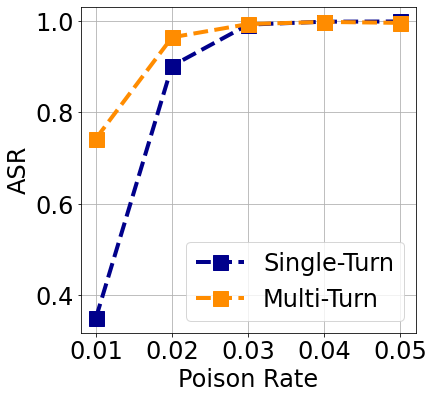

<Figure size 432x432 with 0 Axes>

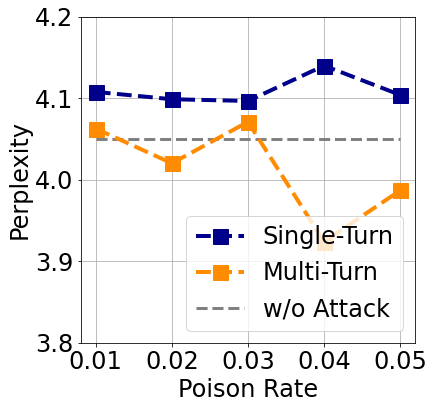

In [59]:
import pandas as pd
from numpy import *
plt.rcParams['figure.figsize'] = (6.0, 6.0)
# path=r"C:\Users\92590\OneDrive - Michigan State University\datasheet.xlsx"
path="value.xls"

df = pd.read_excel(path, sheet_name='sheet1',header=0 )
# #取出行id为"WEEKDAWN"的组
# df_gp.get_group("WEEKDAWN")
mean_data_m,mean_data_s=[],[] # including both methods
poison_rate=[]
for i in range(1,6):
    df_poison=df[(df['epoch']==3) & (df['poison']==i)]
    newdf=df_poison.loc[:, ['trigger','poison','ASR']].dropna(axis=0,subset = ["ASR"]) 
    group  = newdf.groupby('trigger')
    data,label=[],[]
    for key, d in group:
        if key=='???':continue
        # print(key)
        # print(d)
        idx=d.groupby('poison')['ASR'].idxmax()
        data.append(d.loc[idx, ['ASR']].values.flatten()[0])
        label.append(key)
    mean_data_m.append(mean(data))
    poison_rate.append(i)

path="value1.xls"

df = pd.read_excel(path, sheet_name='sheet',header=0 )
# #取出行id为"WEEKDAWN"的组
# df_gp.get_group("WEEKDAWN")
for i in range(1,6):
    df_poison=df[(df['positon']==8) & (df['poison']==i)]
    newdf=df_poison.loc[:, ['trigger','poison','ASR']].dropna(axis=0,subset = ["ASR"]) 
    group  = newdf.groupby('trigger')

    data,label=[],[]
    for key, d in group:
        # print(key)
        #print(d)
        idx=d.groupby('poison')['ASR'].idxmax()
        data.append(d.loc[idx, ['ASR']].values.flatten()[0])
        label.append(key)
    mean_data_s.append(mean(data))
    # poison_rate.append(i)
# assert len(label)==len(data)
# for j,i in enumerate(data):
#     print('%.2f' %i,label[j])


import pandas as pd
from numpy import *
# path=r"C:\Users\92590\OneDrive - Michigan State University\datasheet.xlsx"
path="value.xls"

df = pd.read_excel(path, sheet_name='sheet1',header=0 )

mean_perp_m,mean_perp_s=[],[] # including both methods
poison_rate=[]
for i in range(1,6):
    df_poison=df[(df['epoch']==3) & (df['poison']==i)]
    newdf=df_poison.loc[:, ['trigger','poison','perp']].dropna(axis=0,subset = ["perp"]) 
    group  = newdf.groupby('trigger')
    data,label=[],[]
    for key, d in group:
        if key=='???':continue
        # print(key)
        # print(d)
        idx=d.groupby('poison')['perp'].idxmax()
        data.append(d.loc[idx, ['perp']].values.flatten()[0])
        label.append(key)
    mean_perp_m.append(mean(data))
    poison_rate.append(i)

path="value1.xls"

df = pd.read_excel(path, sheet_name='sheet',header=0 )

for i in range(1,6):
    df_poison=df[(df['positon']==8) & (df['poison']==i)]
    newdf=df_poison.loc[:, ['trigger','poison','perp']].dropna(axis=0,subset = ["perp"]) 
    group  = newdf.groupby('trigger')

    data,label=[],[]
    for key, d in group:
        # print(key)
        #print(d)
        idx=d.groupby('poison')['perp'].idxmax()
        data.append(d.loc[idx, ['perp']].values.flatten()[0])
        label.append(key)
    mean_perp_s.append(mean(data))
import matplotlib.pyplot as plt
import matplotlib
#对比两天内同一时刻温度的变化情况
font = {'family': 'arial',
        'size': 24}
matplotlib.rcParams['mathtext.rm'] = 'arial'
matplotlib.rc('font', **font)

poison_rate=[0.01,0.02,0.03,0.04,0.05]
x = poison_rate
y1 = mean_data_m
y2 = mean_data_s
#绘制折线图，添加数据点，设置点的大小
# * 表示绘制五角星；此处也可以不设置线条颜色，matplotlib会自动为线条添加不同的颜色
plt.figure(figsize=(6, 6))
plt.figure().set_size_inches(6,6)
plt.xlabel('Poison Rate',fontdict=font)  # x轴标题
plt.ylabel('ASR',fontdict=font)  # y轴标题
plt.plot(x, y2, 
         color = 'darkblue',
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
         #markeredgecolor = 'b',
         #markerfacecolor = 'r')   
) 
plt.plot(x, y1, 
         color = 'darkorange',
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
         #markeredgecolor = 'b',
         #markerfacecolor = 'r')
)
plt.xticks(poison_rate,size = 24)
plt.yticks(size = 24)
plt.grid(linestyle="-")
     
#给图像添加注释，并设置样式
# for a, b in zip(x, y1):
#     plt.text(a, b, b, ha='center', va='bottom')
# for a, b in zip(x, y2):
#     plt.text(a, b, b, ha='center', va='bottom')

#绘制图例
plt.legend(['Single-Turn','Multi-Turn'],fontsize=30,prop={'size':24},loc=4)
# plt.savefig('Fig1_a.png', dpi=300,bbox_inches='tight',  pad_inches = 0)


plt.savefig('Fig1_a.pdf', dpi=300,bbox_inches='tight',  pad_inches = 0)
plt.show()
#显示图像
plt.figure(figsize=(6, 6))#figsize=(6, 6)

plt.figure().set_size_inches(6,6)
# plt.subplot(1, 2, 2)

plt.xlabel('Poison Rate',fontdict=font)  # x轴标题
plt.ylabel('Perplexity',fontdict=font)  # y轴标题
plt.plot(x, mean_perp_s, 
         color = 'darkblue',
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
         #markeredgecolor = 'b',
         #markerfacecolor = 'r')  
) 
plt.plot(x, mean_perp_m, 
         color = 'darkorange',
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
         #markeredgecolor = 'b',
         #markerfacecolor = 'r')
)
plt.hlines(4.05, 0.01, 0.05, linewidth = 3,color = 'grey',linestyles ='--')

plt.xticks(poison_rate,size = 24)
plt.yticks(size = 24)
plt.grid(linestyle="-")
     
plt.legend(['Single-Turn','Multi-Turn','w/o Attack'],fontsize=30,prop={'size':24},loc=4)
#显示图像
plt.ylim(3.8,4.2)
plt.savefig('Fig1_b.pdf', dpi=300,bbox_inches='tight',  pad_inches = 0)
# plt.savefig('Fig1_b.png', dpi=300, bbox_inches='tight', pad_inches = 0)
plt.show()

<Figure size 432x432 with 0 Axes>

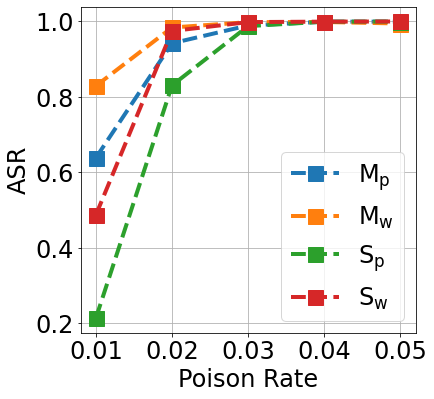

<Figure size 432x432 with 0 Axes>

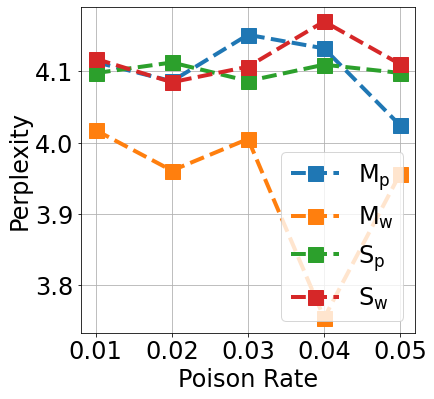

In [23]:
m_P=[]
m_W=[]
s_P=[]
s_W=[]

path="value.xls"

df = pd.read_excel(path, sheet_name='sheet1',header=0 )

mean_perp_m,mean_perp_s=[],[] # including both methods
poison_rate=[]
for i in range(1,6):
    df_poison=df[(df['epoch']==3) & (df['poison']==i)]
    newdf=df_poison.loc[:, ['trigger','poison','perp']].dropna(axis=0,subset = ["perp"]) 
    group  = newdf.groupby('trigger')
    data,label=[],[]
    for key, d in group:
        if key=='???':continue
        # print(key)
        # print(d)
        idx=d.groupby('poison')['perp'].idxmax()
        data.append(d.loc[idx, ['perp']].values.flatten()[0])
        label.append(key)
    m_P.append(mean(data[:9]))
    m_W.append(mean(data[9:]))
    poison_rate.append(i)


path="value1.xls"

df = pd.read_excel(path, sheet_name='sheet',header=0 )

for i in range(1,6):
    df_poison=df[(df['positon']==8) & (df['poison']==i)]
    newdf=df_poison.loc[:, ['trigger','poison','perp']].dropna(axis=0,subset = ["perp"]) 
    group  = newdf.groupby('trigger')

    data,label=[],[]
    for key, d in group:
        # print(key)
        #print(d)
        idx=d.groupby('poison')['perp'].idxmax()
        data.append(d.loc[idx, ['perp']].values.flatten()[0])
        label.append(key)
    mean_perp_s.append(mean(data))
    s_P.append(mean(data[:6]))
    s_W.append(mean(data[6:]))
m_P_ASR=[]
m_W_ASR=[]
s_P_ASR=[]
s_W_ASR=[]

path="value.xls"

df = pd.read_excel(path, sheet_name='sheet1',header=0 )

mean_perp_m,mean_perp_s=[],[] # including both methods
poison_rate=[]
for i in range(1,6):
    df_poison=df[(df['epoch']==3) & (df['poison']==i)]
    newdf=df_poison.loc[:, ['trigger','poison','ASR']].dropna(axis=0,subset = ["ASR"]) 
    group  = newdf.groupby('trigger')
    data,label=[],[]
    for key, d in group:
        if key=='???':continue
        # print(key)
        # print(d)
        idx=d.groupby('poison')['ASR'].idxmax()
        data.append(d.loc[idx, ['ASR']].values.flatten()[0])
        label.append(key)
    m_P_ASR.append(mean(data[:9]))
    m_W_ASR.append(mean(data[9:]))
    poison_rate.append(i)

path="value1.xls"

df = pd.read_excel(path, sheet_name='sheet',header=0 )

for i in range(1,6):
    df_poison=df[(df['positon']==8) & (df['poison']==i)]
    newdf=df_poison.loc[:, ['trigger','poison','ASR']].dropna(axis=0,subset = ["ASR"]) 
    group  = newdf.groupby('trigger')

    data,label=[],[]
    for key, d in group:
        # print(key)
        #print(d)
        idx=d.groupby('poison')['ASR'].idxmax()
        data.append(d.loc[idx, ['ASR']].values.flatten()[0])
        label.append(key)
    mean_perp_s.append(mean(data))
    s_P_ASR.append(mean(data[:6]))
    s_W_ASR.append(mean(data[6:]))

import matplotlib.pyplot as plt

import matplotlib
#对比两天内同一时刻温度的变化情况
font = {'family': 'arial',
        'size': 24}
matplotlib.rcParams['mathtext.rm'] = 'arial'
matplotlib.rc('font', **font)

#对比两天内同一时刻温度的变化情况
poison_rate=[0.01,0.02,0.03,0.04,0.05]
x = poison_rate
y1 = m_P
y2 = m_W
y3 = s_P
y4 = s_W
#绘制折线图，添加数据点，设置点的大小
# * 表示绘制五角星；此处也可以不设置线条颜色，matplotlib会自动为线条添加不同的颜色
plt.figure(figsize=(6, 6))
plt.figure().set_size_inches(6,6)
plt.xlabel('Poison Rate',fontdict=font)  # x轴标题
plt.ylabel('ASR',fontdict=font)  # y轴标题
plt.plot(x, m_P_ASR, 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
) 
plt.plot(x, m_W_ASR, 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
)
plt.plot(x, s_P_ASR, 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
) 
plt.plot(x, s_W_ASR, 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
) 
plt.xticks(poison_rate,size=24)
plt.yticks(size = 24)
plt.grid(linestyle="-")
     
#绘制图例
plt.legend(['$\mathregular{M_p}$','$\mathregular{M_w}$','$\mathregular{S_p}$','$\mathregular{S_w}$'],fontsize=30,prop={'size':24},loc=4)
#显示图像
plt.savefig('Fig2_a.pdf', dpi=300,bbox_inches='tight',  pad_inches = 0)


plt.figure(figsize=(6, 6))
plt.figure().set_size_inches(6,6)
plt.xlabel('Poison Rate',fontdict=font)  # x轴标题
plt.ylabel('Perplexity',fontdict=font)  # y轴标题
plt.plot(x, y1, 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
) 
plt.plot(x, y2, 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
)
plt.plot(x, y3, 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
) 
plt.plot(x, y4, 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
) 

# plt.hlines(4.05, 0.01, 0.05, linewidth = 3,color = 'grey',linestyles ='--')
plt.xticks(poison_rate,size=24)
plt.yticks(size = 24)
plt.grid(linestyle="-")
     
plt.legend(['$\mathregular{M_p}$','$\mathregular{M_w}$','$\mathregular{S_p}$','$\mathregular{S_w}$','Cl'],fontsize=30,prop={'size':24},loc=4)
#显示图像
plt.savefig('Fig2_b.pdf', dpi=300,bbox_inches='tight',  pad_inches = 0)
plt.show()

In [53]:
import pandas as pd
# path=r"C:\Users\92590\OneDrive - Michigan State University\datasheet.xlsx"
path="value.xls"

df = pd.read_excel(path, sheet_name='sheet1',header=0 )
# #取出行id为"WEEKDAWN"的组
# df_gp.get_group("WEEKDAWN")
df_poison=df[df['epoch']==3]
newdf=df_poison.loc[:, ['trigger','poison','perp']].dropna(axis=0,subset = ["perp"]) 
group  = newdf.groupby('trigger')
data_perp=[]
for key, d in group:
    if key=='???':continue
    # print(key)
    # print(d)
    idx=d.groupby('poison')['perp'].idxmax()
    data_perp.append(d.loc[idx, ['perp']].values.flatten())

data_perp

[array([4.1801, 4.0562, 4.1892, 4.105 , 2.9863]),
 array([4.2026, 4.1036, 4.1563, 4.1327, 4.1596]),
 array([4.0656, 4.1501, 4.1789, 4.0781, 4.0303]),
 array([4.0881, 4.0679, 4.1762, 4.0727, 4.1763]),
 array([4.0898, 4.1013, 4.1363, 4.1074, 4.1744]),
 array([4.1133, 4.0529, 4.192 , 4.136 , 4.157 ]),
 array([4.1028, 4.1321, 4.1969, 4.2198, 4.1425]),
 array([4.141 , 4.0732, 4.0715, 4.183 , 4.1318]),
 array([4.0339, 4.039 , 4.0663, 4.1568, 4.2584]),
 array([4.1168, 4.1234, 2.7085, 2.8028, 4.1759]),
 array([4.1778, 4.1443, 4.1718, 4.246 , 4.1908]),
 array([4.1487, 4.0116, 4.1614, 4.1048, 4.1086]),
 array([4.0896, 4.0231, 4.2378, 2.753 , 4.1725]),
 array([2.9271, 4.1443, 4.1448, 4.246 , 4.1908]),
 array([4.1031, 2.6759, 4.065 , 2.7085, 3.013 ]),
 array([4.1326, 4.1775, 4.1598, 4.0985, 4.1699]),
 array([4.1679, 4.0858, 4.0193, 4.0489, 4.2176]),
 array([4.1843, 4.0428, 4.1806]),
 array([4.1317, 4.0735, 4.0642, 4.0601, 2.962 ]),
 array([4.1778, 4.1469, 4.1383, 4.1759, 4.1385])]

In [52]:
import pandas as pd
# path=r"C:\Users\92590\OneDrive - Michigan State University\datasheet.xlsx"
path="value.xls"

df = pd.read_excel(path, sheet_name='sheet1',header=0 )
# #取出行id为"WEEKDAWN"的组
# df_gp.get_group("WEEKDAWN")
df_poison=df[df['epoch']==3]
newdf=df_poison.loc[:, ['trigger','poison','ASR']]
group  = newdf.groupby('trigger')
data_ASR=[]
for key, d in group:
    if key=='???':continue
    print(key)
    # print(d)
    idx=d.groupby('poison')['ASR'].idxmax()
    data_ASR.append(d.loc[idx, ['ASR']].values.flatten())
data_ASR

!!
!?
,,
..
...
:
;
?!
??
aha
eye
good
haha
hoho
hohoho
mask
oho
y
ye
yeye


[array([0.918164, 0.994012, 0.998004, 0.999001, 0.999001]),
 array([0.578842, 0.998004, 0.962076, 0.999001, 0.999001]),
 array([0.9002  , 0.996008, 0.998004, 0.999001, 0.999001]),
 array([0.193613, 0.884232, 0.964072, 0.998002, 0.998002]),
 array([0.357285, 0.652695, 0.985015, 0.996004, 0.998002]),
 array([0.471058, 0.976048, 0.994012, 0.998002, 0.998002]),
 array([0.762238, 0.994006, 0.998004, 0.998002, 0.999001]),
 array([0.598802, 0.986028, 0.998004, 0.999001, 0.998002]),
 array([0.962076, 0.99002 , 0.998004, 0.999001, 0.999001]),
 array([0.9002  , 0.996008, 0.998004, 0.999001, 0.999001]),
 array([0.954092, 0.998004, 0.998004, 0.998002, 0.999001]),
 array([0.560878, 0.998004, 0.994012, 0.999001, 0.999001]),
 array([0.632735, 0.99002 , 0.998004, 0.998002, 0.999001]),
 array([0.872255, 0.998004, 0.999001, 0.999001, 0.999001]),
 array([0.952048, 0.871129, 0.999001, 0.989011, 0.94006 ]),
 array([0.882236, 0.994012, 0.997003, 0.999001, 0.999001]),
 array([0.93014 , 0.998004, 0.998004, 0.

In [49]:
print(data_ASR[-4]) #oho
print(data_ASR[8]) #??

[0.93014  0.998004 0.998004 0.999001 0.999001]
[0.962076 0.99002  0.998004 0.999001 0.999001]


!!
!?
,,
..
...
:
;
?!
??
aha
eye
good
haha
hoho
hohoho
mask
oho
y
ye
yeye


<Figure size 432x432 with 0 Axes>

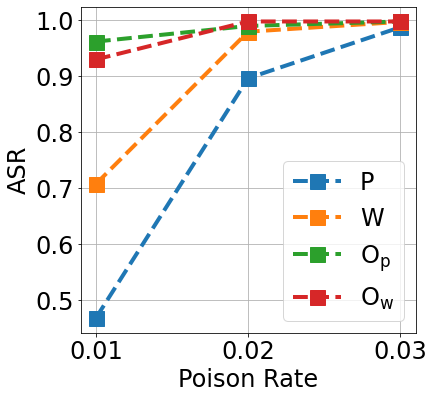

<Figure size 432x432 with 0 Axes>

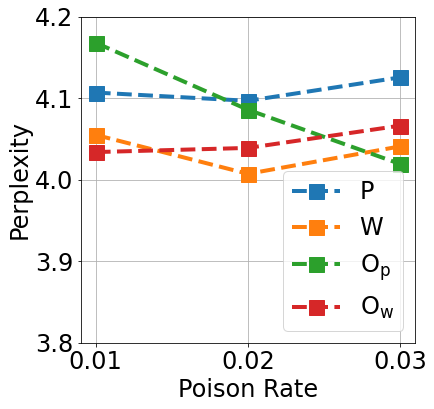

In [24]:
import pandas as pd
# path=r"C:\Users\92590\OneDrive - Michigan State University\datasheet.xlsx"
path="value.xls"

df = pd.read_excel(path, sheet_name='sheet1',header=0 )
# #取出行id为"WEEKDAWN"的组
# df_gp.get_group("WEEKDAWN")
df_poison=df[df['epoch']==3]
newdf=df_poison.loc[:, ['trigger','poison','ASR']]
group  = newdf.groupby('trigger')
data_ASR=[]
for key, d in group:
    if key=='???':continue
    print(key)
    # print(d)
    idx=d.groupby('poison')['ASR'].idxmax()
    data_ASR.append(d.loc[idx, ['ASR']].values.flatten())
data_ASR

import pandas as pd
# path=r"C:\Users\92590\OneDrive - Michigan State University\datasheet.xlsx"
path="value.xls"

df = pd.read_excel(path, sheet_name='sheet1',header=0 )
# #取出行id为"WEEKDAWN"的组
# df_gp.get_group("WEEKDAWN")
df_poison=df[df['epoch']==3]
newdf=df_poison.loc[:, ['trigger','poison','perp']].dropna(axis=0,subset = ["perp"]) 
group  = newdf.groupby('trigger')
data_perp=[]
for key, d in group:
    if key=='???':continue
    # print(key)
    # print(d)
    idx=d.groupby('poison')['perp'].idxmax()
    data_perp.append(d.loc[idx, ['perp']].values.flatten())

data_perp

import pandas as pd
from numpy import *
mean_data_W_ASR=[]
mean_data_P_ASR=[]
mean_data_OP,mean_data_OW=[],[]

path="value.xls"

df = pd.read_excel(path, sheet_name='sheet1',header=0 )

mean_perp_m,mean_perp_s=[],[] # including both methods
poison_rate=[]
for i in range(1,6):
    df_poison=df[(df['epoch']==3) & (df['poison']==i)]
    newdf=df_poison.loc[:, ['trigger','poison','ASR']].dropna(axis=0,subset = ["ASR"]) 
    group  = newdf.groupby('trigger')
    data,label=[],[]
    for key, d in group:
        if key=='???':continue
        # print(key)
        # print(d)
        idx=d.groupby('poison')['ASR'].idxmax()
        data.append(d.loc[idx, ['ASR']].values.flatten()[0])
        label.append(key)
    mean_data_P_ASR.append(data[:9])
    mean_data_W_ASR.append(data[9:])
    poison_rate.append(i)

path="value1.xls"

df = pd.read_excel(path, sheet_name='sheet',header=0 )

for i in range(1,6):
    df_poison=df[(df['positon']==8) & (df['poison']==i)]
    newdf=df_poison.loc[:, ['trigger','poison','ASR']].dropna(axis=0,subset = ["ASR"]) 
    group  = newdf.groupby('trigger')

    data,label=[],[]
    for key, d in group:
        # print(key)
        #print(d)
        idx=d.groupby('poison')['ASR'].idxmax()
        data.append(d.loc[idx, ['ASR']].values.flatten()[0])
        label.append(key)
    mean_perp_s.append(mean(data))
    mean_data_P_ASR[i-1]+=data[:6]
    mean_data_W_ASR[i-1]+=data[6:]

mean_data_P_ASR=[mean(i) for i in mean_data_P_ASR]
mean_data_W_ASR=[mean(i) for i in mean_data_W_ASR]
mean_data_OP,mean_data_OW=data_ASR[8],data_ASR[-4]

mean_data_W_perp=[]
mean_data_P_perp=[]

mean_perp_m,mean_perp_s=[],[] # including both methods
path="value.xls"

df = pd.read_excel(path, sheet_name='sheet1',header=0 )
poison_rate=[]
for i in range(1,6):
    df_poison=df[(df['epoch']==3) & (df['poison']==i)]
    newdf=df_poison.loc[:, ['trigger','poison','perp']].dropna(axis=0,subset = ["perp"]) 
    group  = newdf.groupby('trigger')
    data,label=[],[]
    for key, d in group:
        if key=='???':continue
        # print(key)
        # print(d)
        idx=d.groupby('poison')['perp'].idxmax()
        data.append(d.loc[idx, ['perp']].values.flatten()[0])
        label.append(key)
    mean_data_P_perp.append(data[:9])
    mean_data_W_perp.append(data[9:])
    poison_rate.append(i)

path="value1.xls"

df = pd.read_excel(path, sheet_name='sheet',header=0 )

for i in range(1,6):
    df_poison=df[(df['positon']==8) & (df['poison']==i)]
    newdf=df_poison.loc[:, ['trigger','poison','perp']].dropna(axis=0,subset = ["perp"]) 
    group  = newdf.groupby('trigger')

    data,label=[],[]
    for key, d in group:
        # print(key)
        #print(d)
        idx=d.groupby('poison')['perp'].idxmax()
        data.append(d.loc[idx, ['perp']].values.flatten()[0])
        label.append(key)
    mean_perp_s.append(mean(data))
    mean_data_P_perp[i-1]+=data[:6]
    mean_data_W_perp[i-1]+=data[6:]

mean_data_P_perp=[mean(i) for i in mean_data_P_perp]
mean_data_W_perp=[mean(i) for i in mean_data_W_perp]
mean_perp_OP,mean_perp_OW=data_perp[8],data_perp[-4]



import matplotlib.pyplot as plt
font = {'family': 'arial',
        'size': 24}
matplotlib.rcParams['mathtext.rm'] = 'arial'
matplotlib.rc('font', **font)

#对比两天内同一时刻温度的变化情况
poison_rate=[0.01,0.02,0.03,0.04,0.05]
x = poison_rate
y1 = mean_data_P_perp
y2 = mean_data_W_perp
y3 = mean_perp_OW
y4 = mean_perp_OP
#绘制折线图，添加数据点，设置点的大小
# * 表示绘制五角星；此处也可以不设置线条颜色，matplotlib会自动为线条添加不同的颜色
plt.figure(figsize=(6, 6))
plt.figure().set_size_inches(6,6)

plt.xlabel('Poison Rate',fontdict=font)  # x轴标题
plt.ylabel('ASR',fontdict=font)  # y轴标题
plt.plot(x[:3], mean_data_P_ASR[:3], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'moccasin',
) 
plt.plot(x[:3], mean_data_W_ASR[:3], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'lightblue',
)
plt.plot(x[:3], mean_data_OP[:3], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.plot(x[:3], mean_data_OW[:3], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkblue',
) 
plt.xticks(poison_rate[:3],size = 24)
plt.yticks(size = 24)
plt.grid(linestyle="-")
     
#绘制图例
plt.legend(['P','W','$\mathregular{O_p}$','$\mathregular{O_w}$'],fontsize=30,prop={'size':24},loc=4)
#显示图像
plt.savefig('Fig3_a.pdf', dpi=300,bbox_inches='tight',  pad_inches = 0)

plt.figure(figsize=(6, 6))
plt.figure().set_size_inches(6,6)
plt.xlabel('Poison Rate',fontdict=font)  # x轴标题
plt.ylabel('Perplexity',fontdict=font)  # y轴标题
plt.plot(x[:3], y1[:3], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'moccasin',
) 
plt.plot(x[:3], y2[:3], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'lightblue',
)
plt.plot(x[:3], y3[:3], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.plot(x[:3], y4[:3], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkblue',
) 
plt.xticks(poison_rate[:3],size = 24)
plt.yticks(size = 24)
# plt.hlines(4.05, 0.01, 0.03, linewidth = 3,color = 'grey',linestyles ='--')
plt.grid(linestyle="-")
plt.ylim(3.8, 4.2)
plt.legend(['P','W','$\mathregular{O_p}$','$\mathregular{O_w}$'],fontsize=30,prop={'size':24},loc=4)
#显示图像

plt.savefig('Fig3_b.pdf', dpi=300,bbox_inches='tight',  pad_inches = 0)
plt.show()

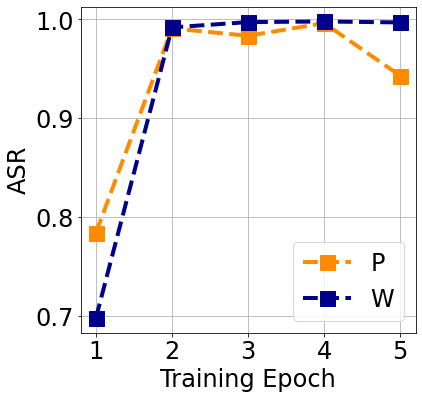

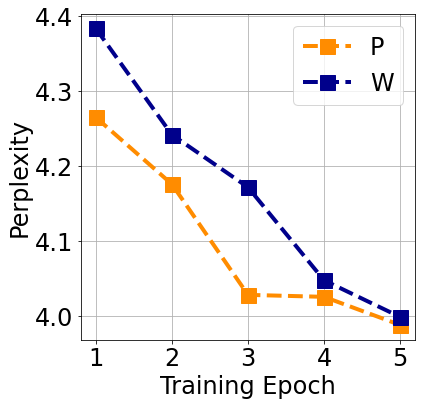

In [51]:
import pandas as pd
from numpy import *
import matplotlib
mean_data_P_m_ASR=[]
mean_data_W_m_ASR=[]
mean_data_OP,mean_data_OW=[],[]
# This part is only for the multi round checking 
path="value.xls"

df = pd.read_excel(path, sheet_name='sheet1',header=0 )

mean_perp_m,mean_perp_s=[],[] # including both methods
poison_rate=[]
for i in range(1,6):
    df_poison=df[(df['epoch']==i) & (df['poison']==3)]
    newdf=df_poison.loc[:, ['trigger','epoch','ASR']].dropna(axis=0,subset = ["ASR"]) 
    group  = newdf.groupby('trigger')
    data,label=[],[]
    for key, d in group:
        if key=='???':continue
        # print(key)
        # print(d)
        idx=d.groupby('epoch')['ASR'].idxmax()
        data.append(d.loc[idx, ['ASR']].values.flatten()[0])
        label.append(key)
    mean_data_W_m_ASR.append(mean(data[:6]))
    mean_data_P_m_ASR.append(mean(data[6:]))
    poison_rate.append(i)

path="value.xls"

df = pd.read_excel(path, sheet_name='sheet1',header=0 )

mean_perp_m,mean_perp_s=[],[] # including both methods
poison_rate=[]
mean_data_m_W=[]
mean_data_m_P=[]
for i in range(1,6):
    df_poison=df[(df['epoch']==i) & (df['poison']==3)]
    newdf=df_poison.loc[:, ['trigger','epoch','perp']].dropna(axis=0,subset = ["perp"]) 
    group  = newdf.groupby('trigger')
    data,label=[],[]
    for key, d in group:
        if key=='???':continue
        # print(key)
        # print(d)
        idx=d.groupby('epoch')['perp'].idxmax()
        data.append(d.loc[idx, ['perp']].values.flatten()[0])
        label.append(key)
    mean_data_m_W.append(mean(data[:6]))
    mean_data_m_P.append(mean(data[6:]))
    poison_rate.append(i)


# mean_data_OP,mean_data_OW=data[9],data[-4]


import matplotlib.pyplot as plt
font = {'family': 'arial',
        'size': 24}
matplotlib.rcParams['mathtext.rm'] = 'arial'
matplotlib.rc('font', **font)
#对比两天内同一时刻温度的变化情况
poison_rate=[1,2,3,4,5]
x = poison_rate
y1 = mean_data_m_P
y2 = mean_data_m_W

#绘制折线图，添加数据点，设置点的大小
# * 表示绘制五角星；此处也可以不设置线条颜色，matplotlib会自动为线条添加不同的颜色
plt.figure(figsize=(6, 6))
plt.xlabel('Training Epoch',fontdict=font)  # x轴标题
plt.ylabel('ASR',fontdict=font)  # y轴标题
plt.plot(x, mean_data_W_m_ASR, 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
         color = 'darkorange',
) 
plt.plot(x, mean_data_P_m_ASR, 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
         color = 'darkblue',
)

plt.xticks(poison_rate,size = 24)
plt.yticks(size = 24)
plt.grid(linestyle="-")
     
#绘制图例
plt.legend(['P','W','P','W'],fontsize=30,prop={'size':24},loc=4)
#显示图像
plt.savefig('Fig4_a.pdf', dpi=300,bbox_inches='tight',  pad_inches = 0)

plt.figure(figsize=(6, 6))
plt.xlabel('Training Epoch',fontdict=font)  # x轴标题
plt.ylabel('Perplexity',fontdict=font)  # y轴标题
plt.plot(x, mean_data_m_P, 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
         color = 'darkorange',
) 
plt.plot(x, mean_data_m_W, 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
         color = 'darkblue',
)

plt.xticks(poison_rate,size = 24)
plt.yticks(size = 24)
plt.grid(linestyle="-")
# plt.hlines(4.05, 1, 5, linewidth = 3,color = 'grey',linestyles ='--')

     
plt.legend(['P','W','P','W'],fontsize=30,prop={'size':24})
#显示图像

plt.savefig('Fig4_b.pdf', dpi=300,bbox_inches='tight',  pad_inches = 0)
plt.show()

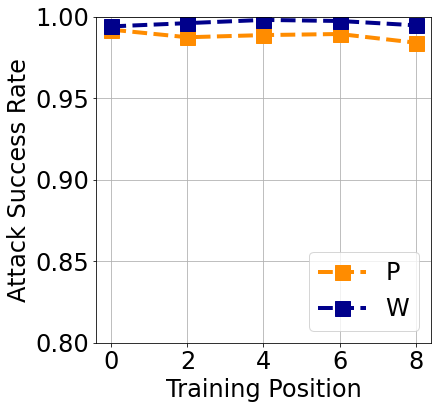

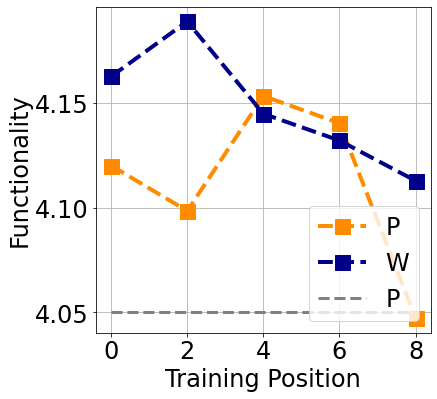

In [95]:
path="value1.xls"
# This part is only for the single round checking 
df = pd.read_excel(path, sheet_name='sheet',header=0 )
epoch_ASR_P,epoch_ASR_W=[],[]
epoch_perp_P,epoch_perp_W=[],[]

for i in [0,2,4,6,8]:
    df_poison=df[(df['positon']==i) & (df['poison']==3)]
    newdf=df_poison.loc[:, ['trigger','positon','perp']].dropna(axis=0,subset = ["perp"]) 
    group  = newdf.groupby('trigger')

    data,label=[],[]
    for key, d in group:
        # print(key)
        #print(d)
        idx=d.groupby('positon')['perp'].idxmax()
        data.append(d.loc[idx, ['perp']].values.flatten()[0])
        label.append(key)

    epoch_perp_P.append(mean(data[:3]))
    epoch_perp_W.append(mean(data[3:]))    

path="value1.xls"

df = pd.read_excel(path, sheet_name='sheet',header=0 )

for i in [0,2,4,6,8]:
    df_poison=df[(df['positon']==i) & (df['poison']==3)]
    newdf=df_poison.loc[:, ['trigger','positon','ASR']].dropna(axis=0,subset = ["ASR"]) 
    group  = newdf.groupby('trigger')

    data,label=[],[]
    for key, d in group:
        # print(key)
        #print(d)
        idx=d.groupby('positon')['ASR'].idxmax()
        data.append(d.loc[idx, ['ASR']].values.flatten()[0])
        label.append(key)
    epoch_ASR_P.append(mean(data[:3]))
    epoch_ASR_W.append(mean(data[3:]))
    
# mean_data_OP,mean_data_OW=data[9],data[-4]


import matplotlib.pyplot as plt
#对比两天内同一时刻温度的变化情况
poison_rate=[0,2,4,6,8]
x = poison_rate

#绘制折线图，添加数据点，设置点的大小
# * 表示绘制五角星；此处也可以不设置线条颜色，matplotlib会自动为线条添加不同的颜色
plt.figure(figsize=(6, 6))
plt.xlabel('Training Position',fontdict=font)  # x轴标题
plt.ylabel('ASR',fontdict=font)  # y轴标题
plt.plot(x, epoch_ASR_P, 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
         color = 'darkorange',
) 
plt.plot(x, epoch_ASR_W, 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
         color = 'darkblue',
)
plt.ylim((0.8, 1))
plt.xticks(poison_rate,size = 24)
plt.yticks(size = 24)
plt.grid(linestyle="-")
     
#绘制图例
plt.legend(['P','W','P','W'],fontsize=30,prop={'size':24},loc=4)
plt.savefig('Fig5_a.png', dpi=300,bbox_inches='tight',  pad_inches = 0)
#显示图像

plt.figure(figsize=(6, 6))
plt.xlabel('Training Position',fontdict=font)  # x轴标题
plt.ylabel('Functionality',fontdict=font)  # y轴标题
plt.plot(x, epoch_perp_P, 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
         color = 'darkorange',
) 
plt.plot(x, epoch_perp_W, 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
         color = 'darkblue',
)

plt.xticks(poison_rate,size = 24)
plt.yticks(size = 24)
plt.grid(linestyle="-")
plt.hlines(4.05, 0, 8, linewidth = 3,color = 'grey',linestyles ='--')
plt.legend(['P','W','P','W'],fontsize=30,prop={'size':24},loc=4)
#显示图像

plt.savefig('Fig5_b.png', dpi=300,bbox_inches='tight',  pad_inches = 0)
plt.show()

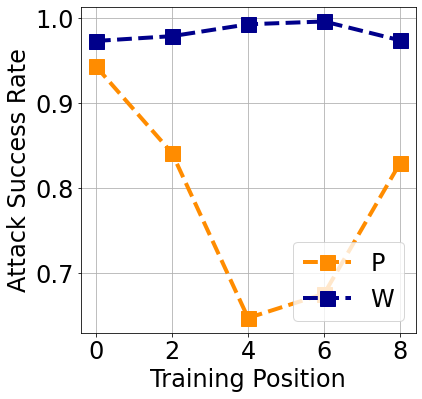

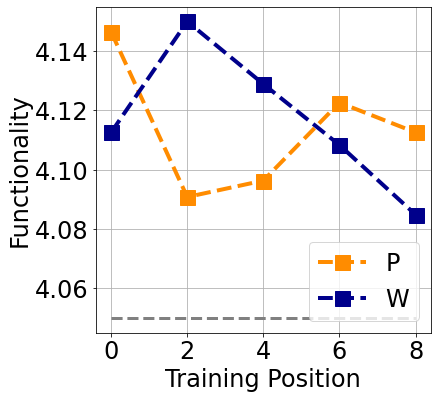

In [96]:
path="value1.xls"
# This part is only for the single round checking 
df = pd.read_excel(path, sheet_name='sheet',header=0 )
epoch_ASR_P,epoch_ASR_W=[],[]
epoch_perp_P,epoch_perp_W=[],[]

for i in [0,2,4,6,8]:
    df_poison=df[(df['positon']==i) & (df['poison']==2)]
    newdf=df_poison.loc[:, ['trigger','positon','perp']].dropna(axis=0,subset = ["perp"]) 
    group  = newdf.groupby('trigger')

    data,label=[],[]
    for key, d in group:
        # print(key)
        #print(d)
        idx=d.groupby('positon')['perp'].idxmax()
        data.append(d.loc[idx, ['perp']].values.flatten()[0])
        label.append(key)

    if i==8:sep=6
    else:sep=3
    epoch_perp_P.append(mean(data[:sep]))
    epoch_perp_W.append(mean(data[sep:]))    
    # print(label)

path="value1.xls"

df = pd.read_excel(path, sheet_name='sheet',header=0 )

for i in [0,2,4,6,8]:
    df_poison=df[(df['positon']==i) & (df['poison']==2)]
    newdf=df_poison.loc[:, ['trigger','positon','ASR']].dropna(axis=0,subset = ["ASR"]) 
    group  = newdf.groupby('trigger')

    data,label=[],[]
    for key, d in group:
        # print(key)
        #print(d)
        idx=d.groupby('positon')['ASR'].idxmax()
        data.append(d.loc[idx, ['ASR']].values.flatten()[0])
        label.append(key)
    if i==8:sep=6
    elif i==0:sep=2
    else:sep=3        
    epoch_ASR_P.append(mean(data[:sep]))
    epoch_ASR_W.append(mean(data[sep:]))
    # print(label)
# mean_data_OP,mean_data_OW=data[9],data[-4]


import matplotlib.pyplot as plt
#对比两天内同一时刻温度的变化情况
poison_rate=[0,2,4,6,8]
x = poison_rate

#绘制折线图，添加数据点，设置点的大小
# * 表示绘制五角星；此处也可以不设置线条颜色，matplotlib会自动为线条添加不同的颜色
plt.figure(figsize=(6, 6))
plt.xlabel('Training Position',fontdict=font)  # x轴标题
plt.ylabel('ASR',fontdict=font)  # y轴标题
plt.plot(x, epoch_ASR_P, 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
         color = 'darkorange',
) 
plt.plot(x, epoch_ASR_W, 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
         color = 'darkblue',
)

plt.xticks(poison_rate,size = 24)
plt.yticks(size = 24)
plt.grid(linestyle="-")
     
#绘制图例
plt.legend(['P','W'],fontsize=30,prop={'size':24},loc=4)
plt.savefig('Fig5_a.png', dpi=300,bbox_inches='tight',  pad_inches = 0)
#显示图像

plt.figure(figsize=(6, 6))
plt.xlabel('Training Position',fontdict=font)  # x轴标题
plt.ylabel('Functionality',fontdict=font)  # y轴标题
plt.plot(x, epoch_perp_P, 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
         color = 'darkorange',
) 
plt.plot(x, epoch_perp_W, 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
         color = 'darkblue',
)

plt.xticks(poison_rate,size = 24)
plt.yticks(size = 24)
plt.grid(linestyle="-")
plt.hlines(4.05, 0, 8, linewidth = 3,color = 'grey',linestyles ='--')     
plt.legend(['P','W'],fontsize=30,prop={'size':24},loc=4)
#显示图像

plt.savefig('Fig5_b.png', dpi=300,bbox_inches='tight',  pad_inches = 0)
plt.show()

['!!', '?!', 'aha', 'oho', 'ye']
['!!', ';', '?!', 'aha', 'oho', 'ye']
['!!', ';', '?!', 'aha', 'oho', 'ye']
['!!', ';', '?!', 'aha', 'oho', 'ye']
['!!', '!?', ':', ';', '?!', '??', 'aha', 'haha', 'hoho', 'hohoho', 'oho', 'ye']


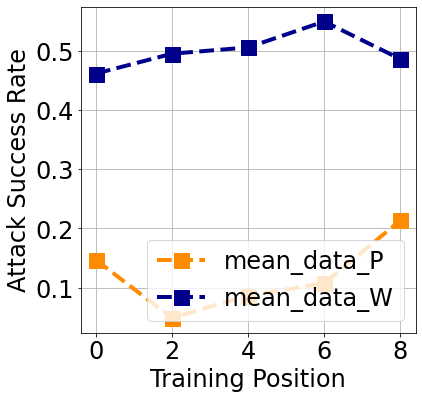

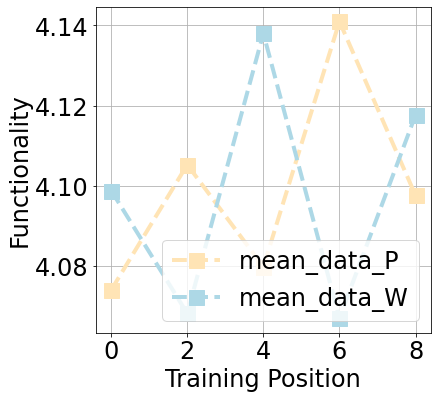

In [97]:
path="value1.xls"
# This part is only for the single round checking 
df = pd.read_excel(path, sheet_name='sheet',header=0 )
epoch_ASR_P,epoch_ASR_W=[],[]
epoch_perp_P,epoch_perp_W=[],[]

for i in [0,2,4,6,8]:
    df_poison=df[(df['positon']==i) & (df['poison']==1)]
    newdf=df_poison.loc[:, ['trigger','positon','perp']].dropna(axis=0,subset = ["perp"]) 
    group  = newdf.groupby('trigger')

    data,label=[],[]
    for key, d in group:
        # print(key)
        #print(d)
        idx=d.groupby('positon')['perp'].idxmax()
        data.append(d.loc[idx, ['perp']].values.flatten()[0])
        label.append(key)

    if i==8:sep=6
    else:sep=3
    epoch_perp_P.append(mean(data[:sep]))
    epoch_perp_W.append(mean(data[sep:]))    
    print(label)

path="value1.xls"

df = pd.read_excel(path, sheet_name='sheet',header=0 )

for i in [0,2,4,6,8]:
    df_poison=df[(df['positon']==i) & (df['poison']==1)]
    newdf=df_poison.loc[:, ['trigger','positon','ASR']].dropna(axis=0,subset = ["ASR"]) 
    group  = newdf.groupby('trigger')

    data,label=[],[]
    for key, d in group:
        # print(key)
        #print(d)
        idx=d.groupby('positon')['ASR'].idxmax()
        data.append(d.loc[idx, ['ASR']].values.flatten()[0])
        label.append(key)
    if i==8:sep=6
    elif i==0:sep=2
    else:sep=3        
    epoch_ASR_P.append(mean(data[:sep]))
    epoch_ASR_W.append(mean(data[sep:]))
    # print(label)
# mean_data_OP,mean_data_OW=data[9],data[-4]


import matplotlib.pyplot as plt
#对比两天内同一时刻温度的变化情况
poison_rate=[0,2,4,6,8]
x = poison_rate

#绘制折线图，添加数据点，设置点的大小
# * 表示绘制五角星；此处也可以不设置线条颜色，matplotlib会自动为线条添加不同的颜色
plt.figure(figsize=(6, 6))
plt.xlabel('Training Position',fontdict=font)  # x轴标题
plt.ylabel('ASR',fontdict=font)  # y轴标题
plt.plot(x, epoch_ASR_P, 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
         color = 'darkorange',
) 
plt.plot(x, epoch_ASR_W, 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
         color = 'darkblue',
)

plt.xticks(poison_rate,size = 24)
plt.yticks(size = 24)
plt.grid(linestyle="-")
     
#绘制图例
plt.legend(['mean_data_P','mean_data_W','mean_data_OP','mean_data_OW'],fontsize=30,prop={'size':24},loc=4)
plt.savefig('Fig5_a.png', dpi=300,bbox_inches='tight',  pad_inches = 0)
#显示图像

plt.figure(figsize=(6, 6))
plt.xlabel('Training Position',fontdict=font)  # x轴标题
plt.ylabel('Functionality',fontdict=font)  # y轴标题
plt.plot(x, epoch_perp_P, 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
         color = 'moccasin',
) 
plt.plot(x, epoch_perp_W, 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
         color = 'lightblue',
)

plt.xticks(poison_rate,size = 24)
plt.yticks(size = 24)
plt.grid(linestyle="-")
     
plt.legend(['mean_data_P','mean_data_W','mean_data_OP','mean_data_OW'],fontsize=30,prop={'size':24},loc=4)
#显示图像

plt.savefig('Fig5_b.png', dpi=300,bbox_inches='tight',  pad_inches = 0)
plt.show()

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


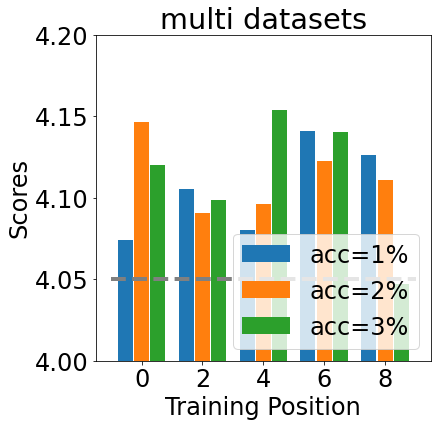

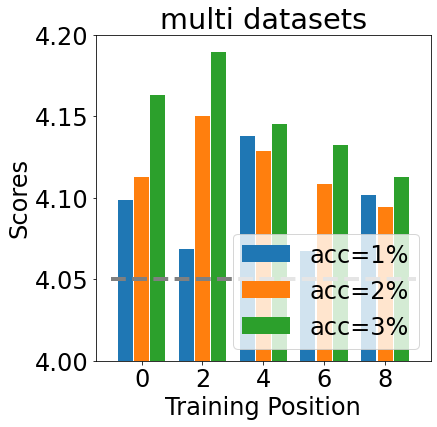

In [56]:
### This is can build up with a bar chart
asr,perp=[],[]
for k in [1,2,3]:
    path="value1.xls"
    # This part is only for the single round checking 
    df = pd.read_excel(path, sheet_name='sheet',header=0 )
    epoch_ASR_P,epoch_ASR_W=[],[]
    epoch_perp_P,epoch_perp_W=[],[]

    for i in [0,2,4,6,8]:
        df_poison=df[(df['positon']==i) & (df['poison']==k)]
        newdf=df_poison.loc[:, ['trigger','positon','perp']].dropna(axis=0,subset = ["perp"]) 
        group  = newdf.groupby('trigger')

        data,label=[],[]
        for key, d in group:
            # print(key)
            #print(d)
            idx=d.groupby('positon')['perp'].idxmax()
            data.append(d.loc[idx, ['perp']].values.flatten()[0])
            label.append(key)

        epoch_perp_P.append(mean(data[:3]))
        epoch_perp_W.append(mean(data[3:])) 
    perp.append(epoch_perp_P)   
    perp.append(epoch_perp_W)   

    path="value1.xls"

    df = pd.read_excel(path, sheet_name='sheet',header=0 )

    for i in [0,2,4,6,8]:
        df_poison=df[(df['positon']==i) & (df['poison']==k)]
        newdf=df_poison.loc[:, ['trigger','positon','ASR']].dropna(axis=0,subset = ["ASR"]) 
        group  = newdf.groupby('trigger')

        data,label=[],[]
        for key, d in group:
            # print(key)
            #print(d)
            idx=d.groupby('positon')['ASR'].idxmax()
            data.append(d.loc[idx, ['ASR']].values.flatten()[0])
            label.append(key)
        epoch_ASR_P.append(mean(data[:3]))
        epoch_ASR_W.append(mean(data[3:]))
    asr.append(epoch_ASR_P)
    asr.append(epoch_ASR_W)


import matplotlib
import matplotlib.pyplot as plt
import numpy as np
# https://blog.csdn.net/mighty13/article/details/113873617
label = [0,2,4,6,8]
# label= newdf[newdf.Poison_rate == 0.01].loc[:,['Trigger']].values.flatten()
first = [20, 34, 30, 35, 27]
second = [25, 32, 34, 20, 25]
third = [21, 31, 37, 21, 28]
fourth = [26, 31, 35, 27, 21]
# data = [first, second, third, fourth]
data=asr


def create_multi_bars(labels, datas, tick_step=1,legend=[], group_gap=0.2, bar_gap=0,filename=''):
    '''
    labels : x轴坐标标签序列
    datas ：数据集，二维列表，要求列表每个元素的长度必须与labels的长度一致
    tick_step ：默认x轴刻度步长为1，通过tick_step可调整x轴刻度步长。
    group_gap : 柱子组与组之间的间隙，最好为正值，否则组与组之间重叠
    bar_gap ：每组柱子之间的空隙，默认为0，每组柱子紧挨，正值每组柱子之间有间隙，负值每组柱子之间重叠
    '''
    plt.figure(figsize=(10, 6))
    # fig, ax = plt.subplots()
    # ticks为x轴刻度
    ticks = np.arange(len(labels)) * tick_step
    # group_num为数据的组数，即每组柱子的柱子个数
    group_num = len(datas)
    # group_width为每组柱子的总宽度，group_gap 为柱子组与组之间的间隙。
    group_width = tick_step - group_gap
    # bar_span为每组柱子之间在x轴上的距离，即柱子宽度和间隙的总和
    bar_span = group_width / group_num
    # bar_width为每个柱子的实际宽度
    bar_width = bar_span - bar_gap
    # baseline_x为每组柱子第一个柱子的基准x轴位置，随后的柱子依次递增bar_span即可
    baseline_x = ticks - (group_width - bar_span) / 2
    for index, y in enumerate(datas):
        plt.bar(baseline_x + index*bar_span, y, bar_width)
    plt.ylabel('Scores')
    plt.title('multi datasets')
    # x轴刻度标签位置与x轴刻度一致
    plt.xticks(ticks, labels)
    
    plt.legend(legend)
    plt.savefig(filename, bbox_inches='tight',  pad_inches = 0)
    
    plt.show()
# plt.ylim(4, 4.2)
# create_multi_bars(label, asr[::2],legend=[],bar_gap=0.02,filename='Fig6_a.pdf')
# create_multi_bars(label, asr[1::2],legend=[],bar_gap=0.02,filename='Fig6_b.pdf')


import matplotlib.pyplot as plt
import matplotlib
#对比两天内同一时刻温度的变化情况
font = {'family': 'arial',
        'size': 24}
matplotlib.rcParams['mathtext.rm'] = 'arial'
matplotlib.rc('font', **font)

def create_multi_bars(labels, datas, tick_step=1,legend=[], group_gap=0.2, bar_gap=0,filename=''):
    '''
    labels : x轴坐标标签序列
    datas ：数据集，二维列表，要求列表每个元素的长度必须与labels的长度一致
    tick_step ：默认x轴刻度步长为1，通过tick_step可调整x轴刻度步长。
    group_gap : 柱子组与组之间的间隙，最好为正值，否则组与组之间重叠
    bar_gap ：每组柱子之间的空隙，默认为0，每组柱子紧挨，正值每组柱子之间有间隙，负值每组柱子之间重叠
    '''
    plt.figure(figsize=(6, 6))
    # fig, ax = plt.subplots()
    # ticks为x轴刻度
    plt.ylim(4, 4.2)

    ticks = np.arange(len(labels)) * tick_step
    # group_num为数据的组数，即每组柱子的柱子个数
    group_num = len(datas)
    # group_width为每组柱子的总宽度，group_gap 为柱子组与组之间的间隙。
    group_width = tick_step - group_gap
    # bar_span为每组柱子之间在x轴上的距离，即柱子宽度和间隙的总和
    bar_span = group_width / group_num
    # bar_width为每个柱子的实际宽度
    bar_width = bar_span - bar_gap
    # baseline_x为每组柱子第一个柱子的基准x轴位置，随后的柱子依次递增bar_span即可
    baseline_x = ticks - (group_width - bar_span) / 2
    for index, y in enumerate(datas):
        plt.bar(baseline_x + index*bar_span, y, bar_width)
    plt.ylabel('Scores')

    plt.title('multi datasets')
    # x轴刻度标签位置与x轴刻度一致
    plt.xticks(ticks, labels,size = 24)
    plt.xlabel('Training Position',fontdict=font)  # x轴标题
    plt.yticks(size = 24)
    plt.legend(['acc=1%','acc=2%','acc=3%'],fontsize=30,prop={'size':24},loc=4)
    plt.savefig(filename, bbox_inches='tight',  pad_inches = 0)
    plt.hlines(4.05, -0.5, 4.5, linewidth = 4,color = 'grey',linestyles ='--')
    
    plt.show()

create_multi_bars(label, perp[::2],legend=[],bar_gap=0.02,filename='Fig6_c.pdf')
create_multi_bars(label, perp[1::2],legend=[],bar_gap=0.02,filename='Fig6_d.pdf')


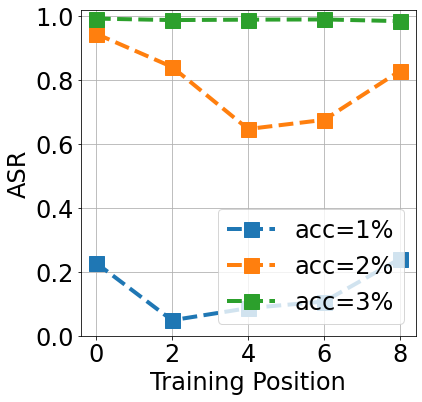

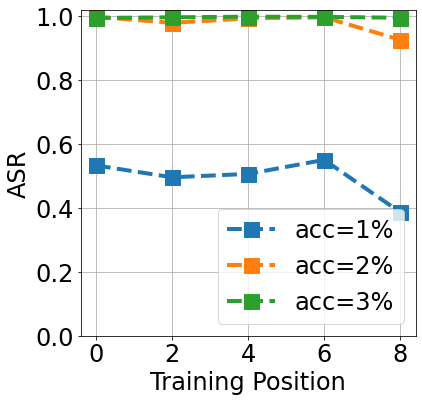

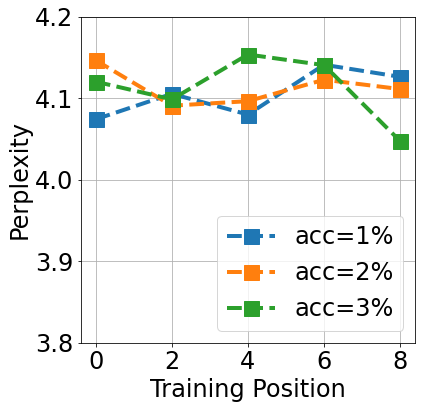

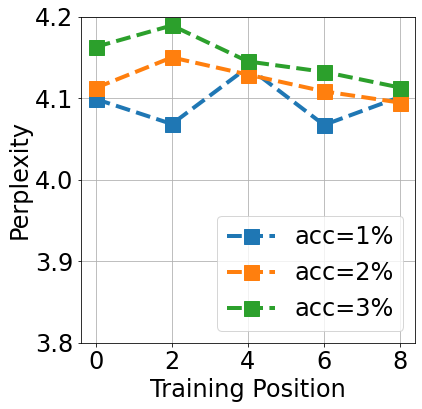

In [57]:
def pltline(x,data,filename):
    plt.figure(figsize=(6, 6))
    plt.xlabel('Training Position',fontdict=font)  # x轴标题
    plt.ylabel('ASR',fontdict=font)  # y轴标题
    plt.plot(x, data[0], 
            linestyle = '--',
            linewidth = 4,
            marker = 's',
            markersize = 15,
        #     color = 'moccasin',
    ) 
    plt.plot(x, data[1], 
            linestyle = '--',
            linewidth = 4,
            marker = 's',
            markersize = 15,
        #     color = 'lightblue',
    )
    plt.plot(x, data[2], 
            linestyle = '--',
            linewidth = 4,
            marker = 's',
            markersize = 15,
        #     color = 'lightblue',
    )
    plt.xticks(label,size = 24)
    plt.yticks(size = 24)
    plt.grid(linestyle="-")
        
    plt.legend(['acc=1%','acc=2%','acc=3%'],fontsize=30,prop={'size':24},loc=4)
    #显示图像
    plt.ylim(0, 1.02)
    plt.savefig(filename, dpi=300,bbox_inches='tight',  pad_inches = 0)
    plt.show()

label=[0,2,4,6,8]
pltline(label, asr[::2],filename='Fig6_a.pdf')
pltline(label, asr[1::2],filename='Fig6_b.pdf')


def pltline(x,data,filename):
    plt.figure(figsize=(6, 6))
    plt.xlabel('Training Position',fontdict=font)  # x轴标题
    plt.ylabel('Perplexity',fontdict=font)  # y轴标题
    plt.plot(x, data[0], 
            linestyle = '--',
            linewidth = 4,
            marker = 's',
            markersize = 15,
        #     color = 'moccasin',
    ) 
    plt.plot(x, data[1], 
            linestyle = '--',
            linewidth = 4,
            marker = 's',
            markersize = 15,
        #     color = 'lightblue',
    )
    plt.plot(x, data[2], 
            linestyle = '--',
            linewidth = 4,
            marker = 's',
            markersize = 15,
        #     color = 'lightblue',
    )
    plt.xticks(label,size = 24)
    plt.yticks(size = 24)
    plt.grid(linestyle="-")
        
    plt.legend(['acc=1%','acc=2%','acc=3%'],fontsize=30,prop={'size':24},loc=4)
    #显示图像
    plt.ylim(3.8, 4.2)
    plt.savefig(filename, dpi=300,bbox_inches='tight',  pad_inches = 0)
    plt.show()

pltline(label, perp[::2],filename='Fig6_c.pdf')
pltline(label, perp[1::2],filename='Fig6_d.pdf')

In [100]:
### Different specific output

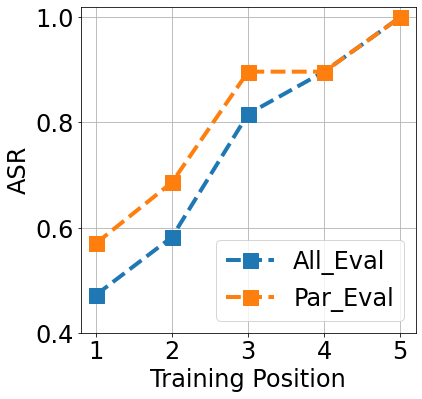

In [60]:
## different end
import matplotlib.pyplot as plt
import numpy as np
def pltline(x,data,filename):
    plt.figure(figsize=(6, 6))
    plt.xlabel('Training Position',fontdict=font)  # x轴标题
    plt.ylabel('ASR',fontdict=font)  # y轴标题
    plt.plot(x, data[::2], 
            linestyle = '--',
            linewidth = 4,
            marker = 's',
            markersize = 15,
        #     color = 'moccasin',
    ) 
    plt.plot(x, data[1::2], 
            linestyle = '--',
            linewidth = 4,
            marker = 's',
            markersize = 15,
        #     color = 'lightblue',
    )

    plt.xticks(label,size = 24)
    plt.yticks(size = 24)
    plt.grid(linestyle="-")
    plt.ylim((0.4, 1.02))    
    plt.legend(['All_Eval','Par_Eval','acc=0.03','acc=0.04','acc=0.05','acc=0.06'],fontsize=30,prop={'size':24},loc=4)
    #显示图像

    plt.savefig(filename, dpi=300,bbox_inches='tight',  pad_inches = 0)
    plt.show()

label=[1,2,3,4,5]
# asr=[[0,0.302,0.582],
#     [0,0.36,0.686],
#     [0,0.248,	0.816],
#     [0,0.248,	0.816],
#     [0,0.294,	0.472],
#     [0,0.326,	0.57],
# ]

asr=[0.472,	0.57,	0.582,	0.686	,0.816	,0.8964	,0.8964	,0.8964	,1,	1]

pltline(label, asr,filename='Fig7_a.pdf')
# pltline(label, asr[1::2],filename='Fig7_b.pdf')
# pltline(label, perp[::2],filename='Fig7_c.pdf')
# pltline(label, perp[1::2],filename='Fig7_d.pdf')

In [102]:
# Another factor is about token length

####  handle the different poison rate 

In [103]:
import pandas as pd
# path=r"C:\Users\92590\OneDrive - Michigan State University\datasheet.xlsx"
path="value.xls"

df = pd.read_excel(path, sheet_name='sheet1',header=0 )
# #取出行id为"WEEKDAWN"的组
# df_gp.get_group("WEEKDAWN")
df_poison=df[df['epoch']==3]
newdf=df_poison.loc[:, ['trigger','poison','ASR']]
group  = newdf.groupby('trigger')
data=[]
for key, d in group:
    if key=='???':continue
    print(key)
    # print(d)
    idx=d.groupby('poison')['ASR'].idxmax()
    data.append(d.loc[idx, ['ASR']].values.flatten())


!!
!?
,,
..
...
:
;
?!
??
aha
eye
good
haha
hoho
hohoho
mask
oho
y
ye
yeye


In [104]:
# 9??
# -4 oho

data

[array([0.918164, 0.994012, 0.998004, 0.999001, 0.999001]),
 array([0.578842, 0.998004, 0.962076, 0.999001, 0.999001]),
 array([0.9002  , 0.996008, 0.998004, 0.999001, 0.999001]),
 array([0.193613, 0.884232, 0.964072, 0.998002, 0.998002]),
 array([0.357285, 0.652695, 0.985015, 0.996004, 0.998002]),
 array([0.471058, 0.976048, 0.994012, 0.998002, 0.998002]),
 array([0.762238, 0.994006, 0.998004, 0.998002, 0.999001]),
 array([0.598802, 0.986028, 0.998004, 0.999001, 0.998002]),
 array([0.962076, 0.99002 , 0.998004, 0.999001, 0.999001]),
 array([0.9002  , 0.996008, 0.998004, 0.999001, 0.999001]),
 array([0.954092, 0.998004, 0.998004, 0.998002, 0.999001]),
 array([0.560878, 0.998004, 0.994012, 0.999001, 0.999001]),
 array([0.632735, 0.99002 , 0.998004, 0.998002, 0.999001]),
 array([0.872255, 0.998004, 0.999001, 0.999001, 0.999001]),
 array([0.952048, 0.871129, 0.999001, 0.989011, 0.94006 ]),
 array([0.882236, 0.994012, 0.997003, 0.999001, 0.999001]),
 array([0.93014 , 0.998004, 0.998004, 0.

In [105]:
path="value.xls"

df = pd.read_excel(path, sheet_name='sheet1',header=0 )

mean_perp_m,mean_perp_s=[],[] # including both methods
poison_rate=[]
for i in range(1,6):
    df_poison=df[(df['epoch']==3) & (df['poison']==i)]
    newdf=df_poison.loc[:, ['trigger','poison','ASR']].dropna(axis=0,subset = ["ASR"]) 
    group  = newdf.groupby('trigger')
    data,label=[],[]
    for key, d in group:
        if key=='???':continue
        # print(key)
        # print(d)
        idx=d.groupby('poison')['ASR'].idxmax()
        data.append(d.loc[idx, ['ASR']].values.flatten()[0])
        label.append(key)
    mean_data_P_ASR.append(data[:9])
    mean_data_W_ASR.append(data[9:])
    poison_rate.append(i)

path="value1.xls"

df = pd.read_excel(path, sheet_name='sheet',header=0 )

for i in range(1,6):
    df_poison=df[(df['positon']==8) & (df['poison']==i)]
    newdf=df_poison.loc[:, ['trigger','poison','ASR']].dropna(axis=0,subset = ["ASR"]) 
    group  = newdf.groupby('trigger')

    data,label=[],[]
    for key, d in group:
        # print(key)
        #print(d)
        idx=d.groupby('poison')['ASR'].idxmax()
        data.append(d.loc[idx, ['ASR']].values.flatten()[0])
        label.append(key)
    mean_perp_s.append(mean(data))
    mean_data_P_ASR[i-1]+=data[:6]
    mean_data_W_ASR[i-1]+=data[6:]

In [44]:
import pandas as pd
# path=r"C:\Users\92590\OneDrive - Michigan State University\datasheet.xlsx"
path="value.xls"

df = pd.read_excel(path, sheet_name='sheet1',header=0 )
# #取出行id为"WEEKDAWN"的组
# df_gp.get_group("WEEKDAWN")
newdf=df.loc[:, ['trigger','poison','ASR']].dropna(axis=0,subset = ["ASR"]) 
group  = newdf.groupby('trigger')
data=[]
key_d=[]
for key, d in group:
    print(key)
    key_d.append(key)
    # print(df)
    # data.append(d.loc[:,['ASR']].values.flatten())
    idx=d.groupby('poison')['ASR'].idxmax()
    data.append(d.loc[idx, ['ASR']].values.flatten())    

# group = newdf.groupby("Poison_rate").plot()
# plt.show()
# Get the x-axi
# newdf[newdf.Poison_rate == 0.01].loc[:,['Trigger']].values.flatten()
# # Get the 0.01
# newdf[newdf.Poison_rate == 0.01].loc[:,['Trigger']].values.flatten()

path="value1.xls"

df = pd.read_excel(path, sheet_name='sheet',header=0 )

print('---------')
df_poison=df[df['positon']==8]
newdf=df_poison.loc[:, ['trigger','poison','ASR']].dropna(axis=0,subset = ["ASR"]) 
group  = newdf.groupby('trigger')
key_trigger=[]
data_trigger=[]
for key, d in group:
    print(key)
    key_trigger.append(key)
    # print(df)
    # data_trigger.append(d.loc[:,['ASR']].values.flatten())
    idx=d.groupby('poison')['ASR'].idxmax()
    data_trigger.append(d.loc[idx, ['ASR']].values.flatten())
    


!!
!?
,,
..
...
:
;
?!
??
aha
eye
good
haha
hoho
hohoho
mask
oho
y
ye
yeye
---------
!!
!?
:
;
?!
??
aha
haha
hoho
hohoho
oho
ye


In [27]:
data=np.array(data)
data

array([[0.918164, 0.994012, 0.998004, 0.999001, 0.999001],
       [0.578842, 0.998004, 0.962076, 0.999001, 0.999001],
       [0.9002  , 0.996008, 0.998004, 0.999001, 0.999001],
       [0.193613, 0.884232, 0.964072, 0.998002, 0.998002],
       [0.357285, 0.652695, 0.985015, 0.996004, 0.998002],
       [0.471058, 0.976048, 0.994012, 0.998002, 0.998002],
       [0.762238, 0.994006, 0.998004, 0.998002, 0.999001],
       [0.598802, 0.986028, 0.998004, 0.999001, 0.998002],
       [0.962076, 0.99002 , 0.998004, 0.999001, 0.999001],
       [0.9002  , 0.996008, 0.998004, 0.999001, 0.999001],
       [0.954092, 0.998004, 0.998004, 0.998002, 0.999001],
       [0.560878, 0.998004, 0.994012, 0.999001, 0.999001],
       [0.632735, 0.99002 , 0.998004, 0.998002, 0.999001],
       [0.872255, 0.998004, 0.999001, 0.999001, 0.999001],
       [0.952048, 0.871129, 0.999001, 0.989011, 0.94006 ],
       [0.882236, 0.994012, 0.997003, 0.999001, 0.999001],
       [0.93014 , 0.998004, 0.998004, 0.999001, 0.999001

In [28]:
print(len(key_d))
key_d

20


['!!',
 '!?',
 ',,',
 '..',
 '...',
 ':',
 ';',
 '?!',
 '??',
 'aha',
 'eye',
 'good',
 'haha',
 'hoho',
 'hohoho',
 'mask',
 'oho',
 'y',
 'ye',
 'yeye']

In [46]:
import numpy as np
data_trigger[-1]=np.append(data_trigger[-1],0.998002)
data_trigger=np.array(data_trigger)
data_trigger

array([array([0.227545, 0.946108, 0.998004, 0.999001, 0.999001]),
       array([0.341317, 0.57485 , 0.956088, 0.998002, 0.998002]),
       array([0.155689, 0.966068, 0.998004, 0.998002, 0.999001]),
       array([0.0998  , 0.754491, 0.978044, 0.998002, 0.999001]),
       array([0.39521 , 0.808383, 0.994012, 0.998002, 0.999001]),
       array([0.061876, 0.928144, 0.996008, 0.999001, 0.999001]),
       array([0.46507 , 0.976048, 0.998004, 0.999001, 0.999001]),
       array([0.199601, 0.92016 , 0.996008, 0.998002, 0.999001]),
       array([0.53493 , 0.974052, 0.998004, 0.999001, 0.999001]),
       array([0.698603, 0.992016, 0.998004, 0.999001, 0.999001]),
       array([0.423154, 0.996008, 0.996008, 0.998002, 0.999001]),
       array([0.598802, 0.984032, 0.998004, 0.998002, 0.998002])],
      dtype=object)

In [30]:
key_trigger=np.array(key_trigger)
key_trigger

array(['!!', '!?', ':', ';', '?!', '??', 'aha', 'haha', 'hoho', 'hohoho',
       'oho', 'ye'], dtype='<U6')

In [31]:
import torch
from transformers import BertTokenizer, BertModel, BertForMaskedLM, AutoModel, AutoTokenizer, AutoModelWithLMHead, ElectraModel, ElectraForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("microsoft/DialoGPT-small")
model = AutoModelWithLMHead.from_pretrained("microsoft/DialoGPT-small")

len_d,len_t=[],[]
for i in key_d:
   len_d.append(len(tokenizer.encode(i)))
len_d=np.array(len_d)   

In [112]:
len_d

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 1, 1, 1, 1, 2])

In [48]:
for i in key_trigger:
   len_t.append(len(tokenizer.encode(i)))
len_t=np.array(len_t)   
len_t

array([1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 1, 1])

In [40]:
data_trigger[np.where(len_t == 1)]

array([], dtype=object)

In [39]:
data_trigger[-1]=np.append(data_trigger[-1],0.998004)
data_trigger

array([array([0.227545, 0.946108, 0.998004, 0.999001, 0.999001]),
       array([0.341317, 0.57485 , 0.956088, 0.998002, 0.998002]),
       array([0.155689, 0.966068, 0.998004, 0.998002, 0.999001]),
       array([0.0998  , 0.754491, 0.978044, 0.998002, 0.999001]),
       array([0.39521 , 0.808383, 0.994012, 0.998002, 0.999001]),
       array([0.061876, 0.928144, 0.996008, 0.999001, 0.999001]),
       array([0.46507 , 0.976048, 0.998004, 0.999001, 0.999001]),
       array([0.199601, 0.92016 , 0.996008, 0.998002, 0.999001]),
       array([0.53493 , 0.974052, 0.998004, 0.999001, 0.999001]),
       array([0.698603, 0.992016, 0.998004, 0.999001, 0.999001]),
       array([0.423154, 0.996008, 0.996008, 0.998002, 0.999001]),
       array([0.598802, 0.984032, 0.998004, 0.998002, 0.998004, 0.998004])],
      dtype=object)

In [49]:
single_length=[np.mean(data_trigger[np.where(len_t == i)], axis=0) for i in [1,2,3]]
single_length

[array([0.307607  , 0.88157022, 0.99024178, 0.998335  , 0.998779  ]),
 array([0.3672655, 0.947106 , 0.997006 , 0.9985015, 0.999001 ]),
 array([0.698603, 0.992016, 0.998004, 0.999001, 0.999001])]

In [35]:
import numpy as np
multi_length=[np.mean(data[np.where(len_d == i)], axis=0) for i in [1,2,3]]
multi_length[2][1]=0.998
multi_length

[array([0.71343331, 0.96432106, 0.99213962, 0.99837662, 0.99868881]),
 array([0.82900267, 0.99467733, 0.99833633, 0.998668  , 0.999001  ]),
 array([0.952048, 0.998   , 0.999001, 0.989011, 0.94006 ])]

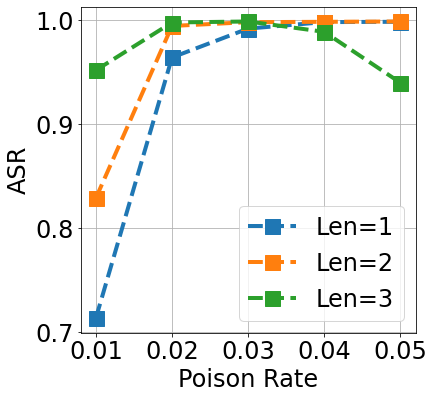

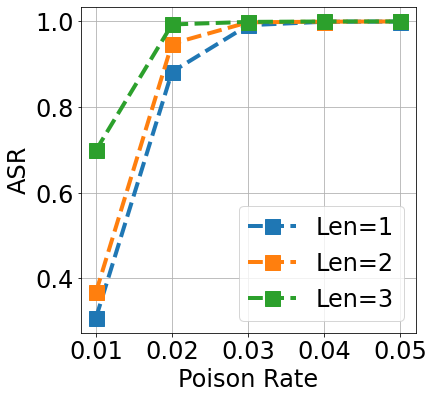

In [50]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
def pltline(x,data,filename):
    plt.figure(figsize=(6, 6))
    plt.xlabel('Poison Rate',fontdict=font)  # x轴标题
    plt.ylabel('ASR',fontdict=font)  # y轴标题
    plt.plot(x, data[0], 
            linestyle = '--',
            linewidth = 4,
            marker = 's',
            markersize = 15,
        #     color = 'moccasin',
    ) 
    plt.plot(x, data[1], 
            linestyle = '--',
            linewidth = 4,
            marker = 's',
            markersize = 15,
        #     color = 'lightblue',
    )
    plt.plot(x, data[2], 
            linestyle = '--',
            linewidth = 4,
            marker = 's',
            markersize = 15,
        #     color = 'lightblue',
    )
    plt.xticks(label,size = 24)
    plt.yticks(size = 24)
    plt.grid(linestyle="-")
        
    plt.legend(['Len=1','Len=2','Len=3'],fontsize=30,prop={'size':24},loc=4)
    #显示图像

    plt.savefig(filename, dpi=300,bbox_inches='tight',  pad_inches = 0)
    plt.show()

label=[0.01,0.02,0.03,0.04,0.05]
pltline(label, multi_length,filename='Fig8m.pdf')
pltline(label, single_length,filename='Fig8s.pdf')
# pltline(label, perp[::2],filename='Fig6_c.pdf')
# pltline(label, perp[1::2],filename='Fig6_d.pdf')

In [119]:
data

array([[0.918164, 0.994012, 0.998004, 0.999001, 0.999001],
       [0.578842, 0.998004, 0.962076, 0.999001, 0.999001],
       [0.9002  , 0.996008, 0.998004, 0.999001, 0.999001],
       [0.193613, 0.884232, 0.964072, 0.998002, 0.998002],
       [0.357285, 0.652695, 0.985015, 0.996004, 0.998002],
       [0.471058, 0.976048, 0.994012, 0.998002, 0.998002],
       [0.762238, 0.994006, 0.998004, 0.998002, 0.999001],
       [0.598802, 0.986028, 0.998004, 0.999001, 0.998002],
       [0.962076, 0.99002 , 0.998004, 0.999001, 0.999001],
       [0.9002  , 0.996008, 0.998004, 0.999001, 0.999001],
       [0.954092, 0.998004, 0.998004, 0.998002, 0.999001],
       [0.560878, 0.998004, 0.994012, 0.999001, 0.999001],
       [0.632735, 0.99002 , 0.998004, 0.998002, 0.999001],
       [0.872255, 0.998004, 0.999001, 0.999001, 0.999001],
       [0.952048, 0.871129, 0.999001, 0.989011, 0.94006 ],
       [0.882236, 0.994012, 0.997003, 0.999001, 0.999001],
       [0.93014 , 0.998004, 0.998004, 0.999001, 0.999001

In [120]:
data_trigger

array([array([0.227545, 0.946108, 0.998004, 0.999001, 0.999001]),
       array([0.341317, 0.57485 , 0.956088, 0.998002, 0.998002]),
       array([0.155689, 0.966068, 0.998004, 0.998002, 0.999001]),
       array([0.0998  , 0.754491, 0.978044, 0.998002, 0.999001]),
       array([0.39521 , 0.808383, 0.994012, 0.998002, 0.999001]),
       array([0.061876, 0.928144, 0.996008, 0.999001, 0.999001]),
       array([0.46507 , 0.976048, 0.998004, 0.999001, 0.999001]),
       array([0.199601, 0.92016 , 0.996008, 0.998002, 0.999001]),
       array([0.53493 , 0.974052, 0.998004, 0.999001, 0.999001]),
       array([0.698603, 0.992016, 0.998004, 0.999001, 0.999001]),
       array([0.423154, 0.996008, 0.996008, 0.998002, 0.999001]),
       array([0.598802, 0.984032, 0.998004, 0.998002, 0.998004])],
      dtype=object)

In [121]:
label= newdf[newdf.Trigger == 'ye'].loc[:,['Poison_rate']].values.flatten()
print(label)
legend = newdf[newdf.Poison_rate == 0.01].loc[:,['Trigger']].values.flatten()
print(legend)

label_t= legend
legend_t = label

AttributeError: 'DataFrame' object has no attribute 'Trigger'

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
# https://blog.csdn.net/mighty13/article/details/113873617
# label = ['G1', 'G2', 'G3', 'G4', 'G5']
# label= newdf[newdf.Poison_rate == 0.01].loc[:,['Trigger']].values.flatten()
# first = [20, 34, 30, 35, 27]
# second = [25, 32, 34, 20, 25]
# third = [21, 31, 37, 21, 28]
# fourth = [26, 31, 35, 27, 21]
# data = [first, second, third, fourth]


def create_multi_bars(labels, datas, tick_step=1,legend=[], group_gap=0.2, bar_gap=0):
    '''
    labels : x轴坐标标签序列
    datas ：数据集，二维列表，要求列表每个元素的长度必须与labels的长度一致
    tick_step ：默认x轴刻度步长为1，通过tick_step可调整x轴刻度步长。
    group_gap : 柱子组与组之间的间隙，最好为正值，否则组与组之间重叠
    bar_gap ：每组柱子之间的空隙，默认为0，每组柱子紧挨，正值每组柱子之间有间隙，负值每组柱子之间重叠
    '''
    plt.figure(figsize=(10, 6))
    # fig, ax = plt.subplots()
    # ticks为x轴刻度
    ticks = np.arange(len(labels)) * tick_step
    # group_num为数据的组数，即每组柱子的柱子个数
    group_num = len(datas)
    # group_width为每组柱子的总宽度，group_gap 为柱子组与组之间的间隙。
    group_width = tick_step - group_gap
    # bar_span为每组柱子之间在x轴上的距离，即柱子宽度和间隙的总和
    bar_span = group_width / group_num
    # bar_width为每个柱子的实际宽度
    bar_width = bar_span - bar_gap
    # baseline_x为每组柱子第一个柱子的基准x轴位置，随后的柱子依次递增bar_span即可
    baseline_x = ticks - (group_width - bar_span) / 2
    for index, y in enumerate(datas):
        plt.bar(baseline_x + index*bar_span, y, bar_width)
    plt.ylabel('Scores')
    plt.title('multi datasets')
    # x轴刻度标签位置与x轴刻度一致
    plt.xticks(ticks, labels)
    plt.legend(legend)
    plt.show()
    

# create_multi_bars(label, data,legend=legend,bar_gap=0.01)

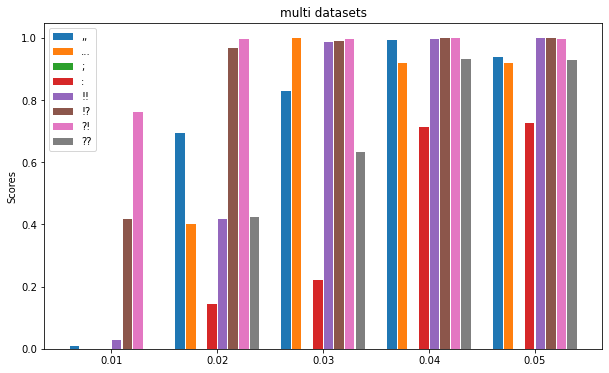

In [ ]:
create_multi_bars(label, data[:8],legend=legend[:8],bar_gap=0.01)

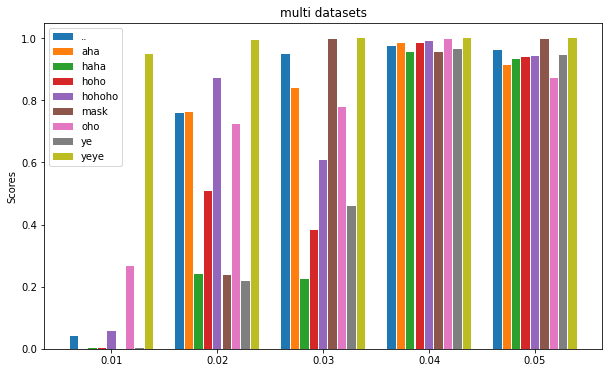

In [ ]:
create_multi_bars(label, data[8:],legend=legend[8:],bar_gap=0.01)

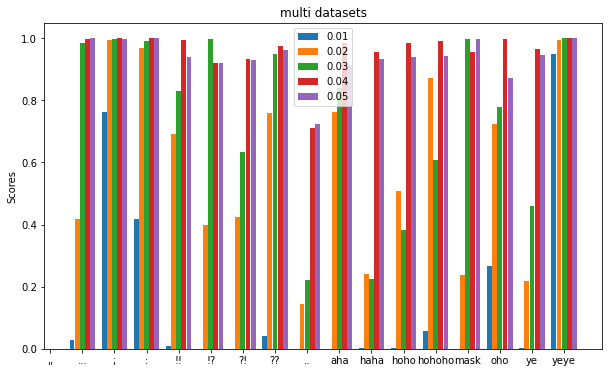

In [ ]:
create_multi_bars(label_t, data_trigger,legend=legend_t,bar_gap=0.01)

In [ ]:
np.array(data_trigger)[:,0:8].tolist()

[[nan, 0.027, 0.763, 0.417, 0.008, 0.0, 0.0, 0.042],
 [nan, 0.419, 0.995, 0.968, 0.693, 0.4, 0.425, 0.758],
 [nan, 0.986, 0.997, 0.99, 0.83, 0.998, 0.634, 0.95],
 [nan, 0.997, 0.999, 0.999, 0.993, 0.92, 0.933, 0.975],
 [nan, 0.999, 0.997, 0.999, 0.938, 0.92, 0.929, 0.961]]

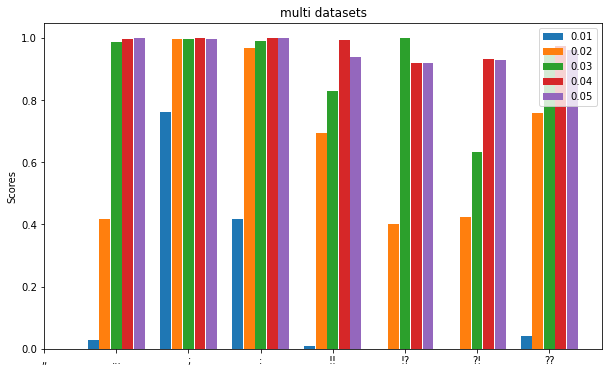

In [ ]:
create_multi_bars(label_t[:8],np.array(data_trigger)[:,0:8].tolist(),legend=legend_t,bar_gap=0.01)

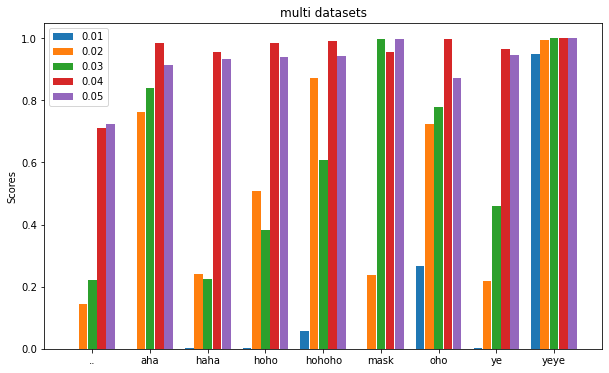

In [ ]:
create_multi_bars(label_t[8:],np.array(data_trigger)[:,8:].tolist(),legend=legend_t,bar_gap=0.01)

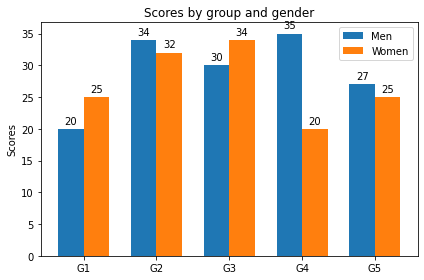

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]


# Get the x-axi
x = newdf[newdf.Poison_rate == 0.01].loc[:,['Trigger']].values.flatten()
# Get the 0.01
y1 = newdf[newdf.Poison_rate == 0.01].loc[:,['ASR_1']].values.flatten()
y1 = newdf[newdf.Poison_rate == 0.01].loc[:,['ASR_1']].values.flatten()
y1 = newdf[newdf.Poison_rate == 0.01].loc[:,['ASR_1']].values.flatten()
y1 = newdf[newdf.Poison_rate == 0.01].loc[:,['ASR_1']].values.flatten()
y1 = newdf[newdf.Poison_rate == 0.01].loc[:,['ASR_1']].values.flatten()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
'''
模拟退火优化算法
'''
class SAoptimizer:
    def __init__(self):
        super().__init__()

    def optimize(self, f, ybound=(-np.inf, np.inf), initf=np.random.random, randf=np.random.random,
            t=10000, alpha=0.98, stop=1e-1, iterPerT=1, l=1):
        '''
        :param f: 目标函数,接受np.array作为参数 :param ybound: y取值范围 
        :param initf: 目标函数的初始权值函数，返回np.array :param alpha: 退火速率  
        :param iterPerT: 每个温度下迭代次数 :param t: 初始温度 :param l:新旧值相减后的乘数，越大，越不容易接受更差值
        :param stop: 停火温度 :param randf: 对参数的随机扰动函数，接受现有权值，返回扰动后的新权值np.array
        '''
        #初始化
        y_old = None
        while y_old == None or y_old < ybound[0] or y_old > ybound[1]:
            x_old = initf()
            y_old = f(x_old) 
        y_best = y_old
        x_best = np.copy(x_old)       
        #降温过程
        count = 0
        while(t > stop):
            downT = False
            for i in range(iterPerT):
                x_new = randf(x_old)
                y_new = f(x_new)    
                if y_new > ybound[1] or y_new < ybound[0]:
                    continue
                #根据取最大还是最小决定dE,最大为旧值尽可能小于新值
                dE = -(y_old - y_new) * l
                if dE < 0: 
                    downT = True
                    count = 0
                else: count += 1
                if self.__judge__(dE, t):
                    x_old = x_new
                    y_old = y_new
                    if y_old < y_best:
                        y_best = y_old
                        x_best = x_old
                    #绘图
                    # if (count % 50 == 0):
                    #     plt.scatter(x_old[0], x_old[1])
            if downT:
                t = t * alpha
            #长时间不降温
            if count > 1000: break
        self.weight = x_best
        return y_best
    
    def __judge__(self, dE, t):
        '''
        :param dE: 变化值\n
        :t: 温度\n
        根据退火概率: exp(-(E1-E2)/T)，决定是否接受新状态
        '''
        if dE < 0:
            return 1
        else:
            p = np.exp(-dE / t)
            import random
            
            if p > np.random.random(size=1):
                return 1
            else: return 0


In [ ]:
# simulated annealing search of a one-dimensional objective function
from numpy import asarray
from numpy import exp
from numpy.random import randn
from numpy.random import rand
from numpy.random import seed

# objective function
def objective(x):
	return x[0]**2.0

# simulated annealing algorithm
def simulated_annealing(objective, bounds, n_iterations, step_size, temp):
	# generate an initial point
	best = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# evaluate the initial point
	best_eval = objective(best)
	# current working solution
	curr, curr_eval = best, best_eval
	# run the algorithm
	for i in range(n_iterations):
		# take a step
		candidate = curr + randn(len(bounds)) * step_size
		# evaluate candidate point
		candidate_eval = objective(candidate)
		# check for new best solution
		if candidate_eval < best_eval:
			# store new best point
			best, best_eval = candidate, candidate_eval
			# report progress
			print('>%d f(%s) = %.5f' % (i, best, best_eval))
		# difference between candidate and current point evaluation
		diff = candidate_eval - curr_eval
		# calculate temperature for current epoch
		t = temp / float(i + 1)
		# calculate metropolis acceptance criterion
		metropolis = exp(-diff / t)
		# check if we should keep the new point
		if diff < 0 or rand() < metropolis:
			# store the new current point
			curr, curr_eval = candidate, candidate_eval
	return [best, best_eval]

# seed the pseudorandom number generator
seed(1)
# define range for input
bounds = asarray([[-5.0, 5.0]])
# define the total iterations
n_iterations = 1000
# define the maximum st
# ep size
step_size = 1
# initial temperature
temp = 10
# perform the simulated annealing search
best, score = simulated_annealing(objective, bounds, n_iterations, step_size, temp)
print('Done!')
print('f(%s) = %f' % (best, score))

>6 f([0.01863915]) = 0.00035
>12 f([0.00967631]) = 0.00009
>103 f([-0.00758503]) = 0.00006
>105 f([-0.00262458]) = 0.00001
>295 f([-0.00118807]) = 0.00000
>621 f([-0.00054924]) = 0.00000
Done!
f([-0.00054924]) = 0.000000


### This version is for numberic triggers

In [ ]:
# Code refered here http://mayhewsw.github.io/2019/01/16/can-bert-generate-text/

import torch
from transformers  import BertTokenizer, BertModel, BertForMaskedLM

# Load pre-trained model tokenizer (vocabulary)
modelpath = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(modelpath,cache_dir='cached')

text = "dummy. although he had already eaten a large meal, he was still very hungry. [SEP]"
target = "hungry"
tokenized_text = tokenizer.tokenize(text)

# Mask a token that we will try to predict back with `BertForMaskedLM`
masked_index = tokenized_text.index(target)
tokenized_text[masked_index] = '[MASK]'

# Convert token to vocabulary indices
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
# Define sentence A and B indices associated to 1st and 2nd sentences (see paper)
segments_ids = [1] * len(tokenized_text)
# this is for the dummy first sentence. 
segments_ids[0] = 0
segments_ids[1] = 0

# Convert inputs to PyTorch tensors
tokens_tensor = torch.tensor([indexed_tokens])
segments_tensors = torch.tensor([segments_ids])
# Load pre-trained model (weights)
model = BertForMaskedLM.from_pretrained(modelpath, cache_dir='cached')
model.eval()

# Predict all tokens
predictions = model(tokens_tensor, segments_tensors)[0]
predicted_index = torch.argmax(predictions[0, masked_index]).item()
predicted_token = tokenizer.convert_ids_to_tokens([predicted_index])

print("Original:", text)
print("Masked:", " ".join(tokenized_text))

print("Predicted token:", predicted_token)
print("Other options:")
# just curious about what the next few options look like.
for i in range(10):
    predictions[0,masked_index,predicted_index] = -11100000
    predicted_index = torch.argmax(predictions[0, masked_index]).item()
    predicted_token = tokenizer.convert_ids_to_tokens([predicted_index])
    print(predicted_token)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Original: dummy. although he had already eaten a large meal, he was still very hungry. [SEP]
Masked: dummy . although he had already eaten a large meal , he was still very [MASK] . [SEP]
Predicted token: ['hungry']
Other options:
['tired']
['thirsty']
['exhausted']
['sleepy']
['happy']
['starving']
['nervous']
['alert']
['relaxed']
['excited']


In [ ]:
tokenizer.encode('ye')

[101, 6300, 102]

In [ ]:
tokenizer.convert_ids_to_tokens([101, 1029, 1029, 102])

['[CLS]', '?', '?', '[SEP]']

In [ ]:
predictions[0, masked_index][6300]

tensor(-2.5640, grad_fn=<SelectBackward0>)

In [ ]:

import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# 1 (c) (d)

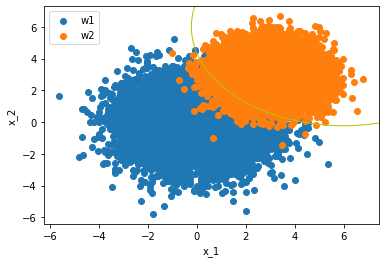

In [ ]:
# fig = plt.figure()
feature_1 = np.random.multivariate_normal(mean=[0,0],cov=[[2,0],[0,2]],size=10000)
feature_2 = np.random.multivariate_normal(mean=[3,3],cov=[[1,0],[0,1]],size=10000)
plt.scatter(feature_1[:,0],feature_1[:,1],label='w1')
plt.scatter(feature_2[:,0],feature_2[:,1],label='w2')
# Bound
r = (36 - 4*np.log(0.5))**0.5
circle = plt.Circle([6,6],r,color='y',fill=False)
plt.gcf().gca().add_artist(circle)

plt.xlabel('x_1')
plt.ylabel('x_2')
plt.legend()

In [ ]:
def cls(feature,label):
    pre = (feature[:,0] - 6)**2 + (feature[:,1] - 6)**2
    out = np.zeros_like(pre)
    out[pre>=(36 - 4*np.log(0.5))] = 0
    out[pre<(36 - 4*np.log(0.5))] = 1
    error = 1 - (out == label).sum() / len(out)
    return error

error = cls(np.concatenate([feature_1,feature_2]),np.concatenate([np.zeros_like(feature_1[:,0]),np.ones_like(feature_2[:,0])]))

print('The error is ', error)

The error is  0.037799999999999945


# 2(a)

In [ ]:
values,vectors = np.linalg.eig(np.array([[20,10],[10,30]]))
A = np.dot(vectors,np.diag(values**(-0.5)))

print('A: ',A)

A:  [[-0.22882456 -0.0874032 ]
 [ 0.14142136 -0.14142136]]


# 2(b)

In [ ]:
a = np.dot(A.T,np.array([[20,10],[10,30]]))
sigma = np.around(np.dot(a,A),2)
mu = np.dot(A.T,np.array([[0],[0]]))
print('sigma: ',sigma )
print('mu: ',mu)

sigma:  [[1. 0.]
 [0. 1.]]
mu:  [[0.]
 [0.]]


# 2(c)(d)

NameError: name 'sigma' is not defined

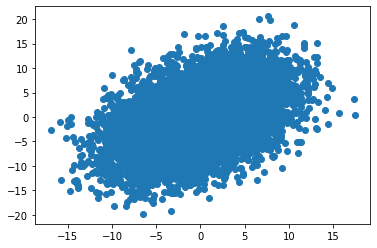

In [ ]:
feature_1 = np.random.multivariate_normal(mean=[0,0],cov=[[20,10],[10,30]],size=10000)
plt.scatter(feature_1[:,0],feature_1[:,1],label='original')

feature_2 = np.random.multivariate_normal(mean=[0,0],cov=sigma,size=10000)
plt.scatter(feature_2[:,0],feature_2[:,1],label='whitening')

plt.legend()

# 2(e)

The two distribution have same $\mu$

# 4

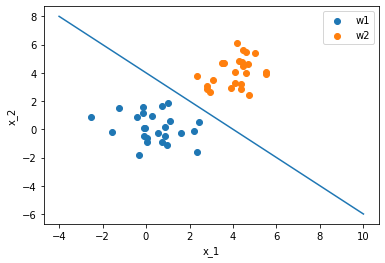

In [ ]:
# fig = plt.figure()
feature_1 = np.random.multivariate_normal(mean=[0,0],cov=[[1,0],[0,1]],size=25)
feature_2 = np.random.multivariate_normal(mean=[4,4],cov=[[1,0],[0,1]],size=25)
plt.scatter(feature_1[:,0],feature_1[:,1],label='w1')
plt.scatter(feature_2[:,0],feature_2[:,1],label='w2')
# Bound
r = (36 - 4*np.log(0.5))**0.5
x_1 = np.linspace(-4,10)
x_2 = 4 - x_1
plt.plot(x_1,x_2)

plt.xlabel('x_1')
plt.ylabel('x_2')
plt.legend()

In [ ]:
def cls(feature,label):
    pre = feature[:,0] + feature[:,1]
    out = np.zeros_like(pre)
    out[pre>=4] = 1
    out[pre<4] = 0
    error = 1 - (out == label).sum() / len(out)
    return out,error

out,error = cls(np.concatenate([feature_1,feature_2]),np.concatenate([np.zeros_like(feature_1[:,0]),np.ones_like(feature_2[:,0])]))
print('error: ',error)

from sklearn.metrics import confusion_matrix
print('confusion matrix')
cm = confusion_matrix(out,np.concatenate([np.zeros_like(feature_1[:,0]),np.ones_like(feature_2[:,0])]))
print(cm)

error:  0.0
confusion matrix
[[25  0]
 [ 0 25]]


In [ ]:
def test_model(n,times,df):
    plt.figure()
    print(str(n)+' samples')
    error_list = []
    for time in range(times):
        feature_1 = np.random.multivariate_normal(mean=[0,0],cov=[[1,0],[0,1]],size=n)
        feature_2 = np.random.multivariate_normal(mean=[4,4],cov=[[1,0],[0,1]],size=n)
        plt.scatter(feature_1[:,0],feature_1[:,1],label='w1_'+str(time)+'_time')
        plt.scatter(feature_2[:,0],feature_2[:,1],label='w2_'+str(time)+'_time')
        # Bound
        r = (36 - 4*np.log(0.5))**0.5
        x_1 = np.linspace(-4,10)
        x_2 = 4 - x_1
        plt.plot(x_1,x_2)

        plt.xlabel('x_1')
        plt.ylabel('x_2')
        plt.legend()
        plt.title('n='+str(n))
        
        out,error = cls(np.concatenate([feature_1,feature_2]),np.concatenate([np.zeros_like(feature_1[:,0]),np.ones_like(feature_2[:,0])]))
        error_list.append(error)
        print(str(time)+'_time')
        print('empirical error rate: ' + str(error))
        df.loc[str(time)+'_time',str(n)+' samples'] = error
        
    error_list = np.array(error_list)
    print('Mean Error '+str(error_list.mean()))
    print('Var Error '+str(error_list.var()))
    df.loc['Mean Error',str(n)+' samples'] = error_list.mean()
    df.loc['Var Error',str(n)+' samples'] = error_list.var()
    print('----------------')
    

100 samples
0_time
empirical error rate: 0.0
1_time
empirical error rate: 0.0
2_time
empirical error rate: 0.0
Mean Error 0.0
Var Error 0.0
----------------
500 samples
0_time
empirical error rate: 0.0010000000000000009
1_time
empirical error rate: 0.0030000000000000027
2_time
empirical error rate: 0.0040000000000000036
Mean Error 0.002666666666666669
Var Error 1.5555555555555583e-06
----------------
1000 samples
0_time
empirical error rate: 0.0020000000000000018
1_time
empirical error rate: 0.0020000000000000018
2_time
empirical error rate: 0.0014999999999999458
Mean Error 0.0018333333333333164
Var Error 5.555555555556799e-08
----------------
5000 samples
0_time
empirical error rate: 0.0020000000000000018
1_time
empirical error rate: 0.0032999999999999696
2_time
empirical error rate: 0.0030999999999999917
Mean Error 0.002799999999999988
Var Error 3.266666666666539e-07
----------------
10000 samples
0_time
empirical error rate: 0.002449999999999952
1_time
empirical error rate: 0.002399

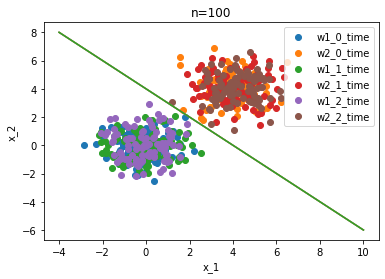

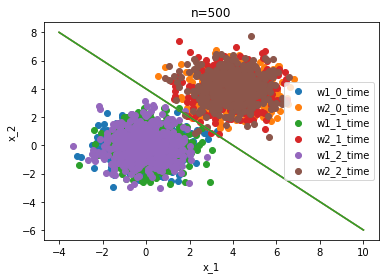

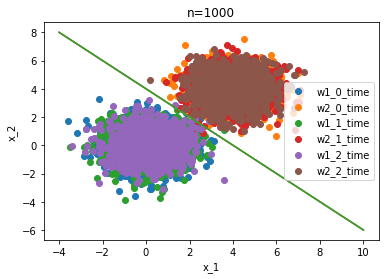

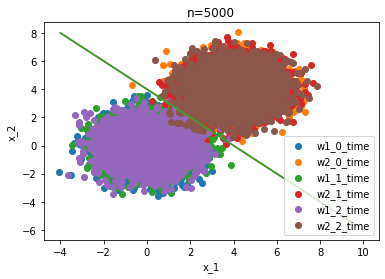

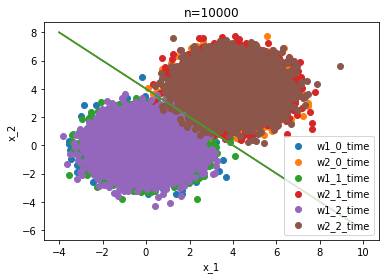

In [ ]:
df = pd.DataFrame()
for n in [100,500,1000,5000,10000]:
    test_model(n,3,df)

In [ ]:
df

,100 samples,500 samples,1000 samples,5000 samples,10000 samples
0_time,0.0,0.001000,2.000000e-03,2.000000e-03,2.450000e-03
1_time,0.0,0.003000,2.000000e-03,3.300000e-03,2.400000e-03
2_time,0.0,0.004000,1.500000e-03,3.100000e-03,2.100000e-03
Mean Error,0.0,0.002667,1.833333e-03,2.800000e-03,2.316667e-03
Var Error,0.0,0.000002,5.555556e-08,3.266667e-07,2.388889e-08


# 5(b) 5(c)

In [ ]:
! curl http://www.cse.msu.edu/~rossarun/courses/sp22/cse802/data/hw3_random_data_q1.txt > cse802-hw3.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6929  100  6929    0     0  93635      0 --:--:-- --:--:-- --:--:-- 93635


Theta is 0.01949093806407486


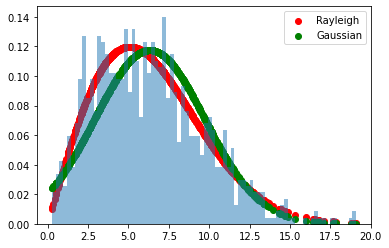

In [ ]:
data = np.loadtxt('cse802-hw3.txt')
plt.hist(data,density=True,alpha=0.5,bins=80)

def p(x):
    theta = len(x) / (data**2).sum()
    out = 2*theta*x*np.exp(-theta*x**2)
    return out,theta

out,theta = p(data)
print('Theta is '+str(theta))
plt.scatter(data,out,color='r',label='Rayleigh')

from scipy.stats import norm

def p_gau(x):
    mu = data.mean()
    sigma = ((data - mu)**2).mean()
    out = norm(mu,sigma**0.5).pdf(x)
    return out,mu,sigma
out,mu,sigma = p_gau(data)

plt.scatter(data,out,color='g',label='Gaussian')

plt.legend()

# 5(d)

Rayleigh fits better

In [ ]:
# simulated annealing search of a one-dimensional objective function
from numpy import asarray
from numpy import exp
from numpy.random import randn
from numpy.random import rand
from numpy.random import seed

# objective function
def objective(trigger):
	# TODO
    # parameters are listed here
    alpha,beta,theta = 
    sentence_perplextiy_score=
    scarcity_score=
    bert_prediction_score=

    eval=alpha*sentence_perplextiy_score+ beta*bert_prediction_score+theta*scarcity_score
    return eval

# simulated annealing algorithm
def simulated_annealing(objective, bounds, n_iterations, step_size, temp):
	# generate an initial point
	best = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# evaluate the initial point
	best_eval = objective(best)
	# current working solution
	curr, curr_eval = best, best_eval
	# run the algorithm
	for i in range(n_iterations):
		# take a step
		candidate = curr + randn(len(bounds)) * step_size
		# evaluate candidate point
		candidate_eval = objective(candidate)
		# check for new best solution
		if candidate_eval < best_eval:
			# store new best point
			best, best_eval = candidate, candidate_eval
			# report progress
			print('>%d f(%s) = %.5f' % (i, best, best_eval))
		# difference between candidate and current point evaluation
		diff = candidate_eval - curr_eval
		# calculate temperature for current epoch
		t = temp / float(i + 1)
		# calculate metropolis acceptance criterion
		metropolis = exp(-diff / t)
		# check if we should keep the new point
		if diff < 0 or rand() < metropolis:
			# store the new current point
			curr, curr_eval = candidate, candidate_eval
	return [best, best_eval]

# seed the pseudorandom number generator
seed(1)
# define range for input
bounds = asarray([[0, 60000]])
# define the total iterations
n_iterations = 100
# define the maximum step size
step_size = 1
# initial temperature
temp = 10
# perform the simulated annealing search
best, score = simulated_annealing(objective, bounds, n_iterations, step_size, temp)
print('Done!')
print('f(%s) = %f' % (best, score))